## Final_Project: 
## Efficient hCoV-19 Variant Identification Made Easy: Introducing the Gene-Variant Caller App integrated with ML Model

In [303]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
## multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder# example of a one hot encoding
from numpy import asarray# example of a one hot encoding
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## Neural Network 

## To  predict a new Amino Acid sequence/or its class (variant).

### Dataset

In [304]:
test = pd.read_csv('new_for_model_testing.csv')
test= list(test['spike_aa'])[4]#for predicting 
#test#
seqs = pd.read_csv('modelling_set1.csv')#for trainingset




In [305]:
seqs

,index,orf1a_cdna_width,orf1a_aa,orf1a_aa_width,spike_cdna_width,spike_aa,spike_aa_width,type,Wild_type,B.1.1.7_Alpha,B.1.351_Beta,B.1.1.248_P1_Gamma,P.2_Zeta,B.1.617.1_Kappa,B.1.617.2_Delta,B.1.617.2_Delta_Plus,B.1.617.3,B.1.427_Epsilon,B.1.429_Epsilon,B.1.526_Iota,B.1.525_Eta,P.3_Theta,B.1.1.529_Omicron,B.1.1.529.1_Omicron,Delta_lineage,Omicron_lineage,Other,variant,duplicated
0,0,13206,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,4402,3810,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha,False
1,1,13206,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,4402,3810,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,Other,False
2,8,13206,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,4402,3810,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha,False
3,10,13206,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,4402,3810,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha,False
4,12,13206,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,4402,3810,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12601,150064,13203,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,4401,3810,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,B.1.1.529_Omicron,False
12602,150073,13206,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,4402,3801,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1267,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,Other,False
12603,150080,13203,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,4401,3810,MFVFLVLLPLVSIQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,B.1.1.529_Omicron,False
12604,150084,13203,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...,4401,3810,MFVFLVLLPLVFSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,B.1.1.529_Omicron,False


In [340]:
#seqs
seqs=modelling_set
seqs=seqs[['spike_aa', 'spike_aa_width']]
seqs['spike_aa_width']=seqs['spike_aa'].str.len()
#type
seqs['type'] = seqs['spike_aa'].apply(lambda x: "wild type" if x[17]=="L" and x[68]=="H" and
x[69]== "V" and x[79]=="D" and x[144]=="Y" and x[214]=="D" and x[241]=="L" and x[242]=="A" and
 x[243]=="L" and x[245]=="R" and x[416]=="K" and x[483]=="E" and x[500]=="N" and x[569]=="A" and
 x[613]=="D" and x[680]=="P" and x[700]=="A"and x[715]=="T" and x[981]=="S" and
 x[1117]=="D" else "variant")
#Wild_type
seqs['Wild_type'] = seqs['spike_aa'].apply(lambda x: "yes" if x[17]=="L" and x[68]=="H" and
x[69]== "V" and x[79]=="D" and x[144]=="Y" and x[214]=="D" and x[241]=="L" and x[242]=="A" and
 x[243]=="L" and x[245]=="R" and x[416]=="K" and x[483]=="E" and x[500]=="N" and x[569]=="A" and
 x[613]=="D" and x[680]=="P" and x[700]=="A"and x[715]=="T" and x[981]=="S" and
 x[1117]=="D" else "no")

#B.1.1.7_Alpha: B.1.1.17 Lineage_UK or 501Y.V1  strain
seqs['B.1.1.7_Alpha'] = seqs['spike_aa'].apply(lambda x: "yes" if x[68]=="S" and
x[69]== "G" and x[77]=="D" and x[79]=="P" and x[144]=="N" and x[500]=="G" and
x[569]=="T" and x[610]=="G" and x[613]=="C" and x[677]=="H" and x[680]=="A" and
x[712]=="I"and x[715]=="T" and x[978]=="A"and x[981]=="D" and x[1114]=="H" and
x[1117]=="F" else "no")
#B.1.351_Beta
seqs['B.1.351_Beta'] = seqs['spike_aa'].apply(lambda x: "yes" if x[17]=="F" and
x[79]== "A" and x[79]=="D" and x[214]=="G" and x[241]=="H" and x[242]=="I" and
 x[243]=="S" and x[245]=="L" and x[413]=="N" and x[480]=="K" and x[497]=="Y" and
 x[500]=="G" and x[610]=="G" and x[613]=="C" and x[697]=="V" and x[700]=="S" else "no")

#B.1.1.248  or P1 Lineage_Gamma,Brazilian strain
seqs['B.1.1.248_P1_Gamma'] = seqs['spike_aa'].apply(lambda x: "yes" if x[416]=="T" and
x[483]=="K" and x[500]== "Y" else "no")

#P.2_BRAZIL
seqs['P.2_Zeta'] = seqs['spike_aa'].apply(lambda x: "yes" if x[483]=="K" and x[613]== "G" else "no")

#Indian, B.1.617_kappa
seqs['B.1.617.1_Kappa'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="R" and
x[143]== "D" and x[155]=="G" and x[156]=="V" and x[449]=="R" and x[475]=="T" and
 x[481]=="Q" and x[611]=="G" and x[678]=="R" else "no")
#Indian, B.1.617_delta variant
seqs['B.1.617.2_Delta'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="R" and
 x[155]=="G" and x[156]=="V" and x[414]=="K" and x[449]=="R" and
  x[475]=="K" and x[481]=="E" and x[611]=="G" and x[678]=="R" else "no")
#Indian, B.1.617_delta_Plus variant
seqs['B.1.617.2_Delta_Plus'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="R" and
 x[155]=="G" and x[156]=="V" and x[414]=="N" and x[449]=="R" and
  x[475]=="K" and x[481]=="E" and x[611]=="G" and x[678]=="R" else "no")
#Indian, B.1.617.3
seqs['B.1.617.3'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="R" and
 x[155]=="G" and x[156]=="V" and x[449]=="R" and
  x[475]=="T" and x[481]=="Q" and x[611]=="G" and x[678]=="R" else "no")

#Epsilon_B.1.427_USA-California
seqs['B.1.427_Epsilon'] = seqs['spike_aa'].apply(lambda x: "yes" if x[451]=="R" and x[613]=="G" else "no")
#Epsilon_B.1.429_USA-California
seqs['B.1.429_Epsilon'] = seqs['spike_aa'].apply(lambda x: "yes" if x[12]=="I" and x[151]=="C" and
x[451]=="R" & x[613]=="G" else "no")

#Iota_B.1.526_USA-NEW YORK
seqs['B.1.526_Iota'] = seqs['spike_aa'].apply(lambda x: "yes" if x[4]=="L" and x[94]=="I" and
x[252]=="G" and x[476]=="N" and x[483]=="K" and x[613]=="G" else "no")

#Eta_B.1.525_USA-NEW YORK AND DENMARK
#recheck whether its X67 or X69?
seqs['B.1.525_Eta'] = seqs['spike_aa'].apply(lambda x: "yes" if x[68]=="S" and x[69]=="G" and
x[94]=="I" and x[252]=="G" and x[476]=="N" and x[483]=="K" and x[613]=="G" and x[613]=="G" and
x[887]=="L" else "no")

# P.3 Variant_Theta
seqs['P.3_Theta'] = seqs['spike_aa'].apply(lambda x: "yes" if x[140]=="Y" and x[141]=="H" and
x[142]=="K" and x[480]=="K" and x[497]=="Y" and x[610]=="G" and x[677]=="H" and x[1088]=="K" and
x[1097]=="Y" and x[1172]=="F" else "no")

#Lambda
seqs['Lambda'] = seqs['spike_aa'].apply(lambda x: "yes" if x[68]=="H" and
x[74]== "V" and x[75]=="I" and x[141]=="G" and x[212]=="V" and x[245]=="N" and
x[247]=="S" and x[331]=="G" and x[444]=="Q" and x[482]=="S" and x[606]=="G" and
x[851]=="N" else "no")

#BF.7
seqs['BF.7'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[65]=="S" and x[136]=="D" and x[207]=="G" and
  x[333]=="D" and x[340]=="T" and x[365]=="F" and x[367]=="P" and x[369]=="F" and x[370]=="A" and
 x[399]=="N" and x[402]=="S" and x[411]=="N" and x[434]=="K" and x[438]=="K" and  x[446]=="R" and x[471]=="N"and 
 x[472]=="K" and x[478]=="A" and x[480]=="V" and x[492]=="R" and x[495]=="Y" and x[499]=="H"and 
 x[608]=="G" and x[649]=="Y" and x[673]=="K" and x[675]=="H" and x[758]=="K" and x[790]=="Y"and 
 x[948]=="H" and x[963]=="K" else "no")


#Omicron parental variant BA.1
seqs['B.1.1.529_Omicron'] = seqs['spike_aa'].apply(lambda x: "yes" if x[66]=="V" and
x[68]== "S" and x[92]=="I" and x[139]=="D" and x[140]=="H" and x[141]=="K" and
 x[142]=="N" and x[208]=="E" and x[209]=="P" and x[210]=="E" and x[367]=="L" and
 x[369]=="P" and x[371]=="F" else "no")

#Omicron.1_BA.1.1
seqs['B.1.1.529.1_Omicron'] = seqs['spike_aa'].apply(lambda x: "yes" if x[66]=="V" and
x[68]== "S" and x[92]=="I" and x[139]=="D" and x[140]=="H" and x[141]=="K" and
 x[142]=="N" and x[208]=="E" and x[209]=="P" and x[210]=="E" and x[340]=="K"and x[367]=="L" and
 x[369]=="P" and x[371]=="F" else "no")

#Omicron_BA.2
seqs['Omicron_BA.2'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[209]=="G" and
  x[335]=="D" and x[367]=="F" and x[369]=="P" and x[371]=="F"and x[372]=="A" and
 x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and x[473]=="N"and x[474]=="K" and
x[480]=="A" and x[489]=="R" and x[494]=="R" and x[497]=="Y" and x[501]=="H"and x[610]=="G" and
 x[651]=="Y" and x[675]=="K" and x[677]=="H" and x[760]=="K" and x[792]=="Y"and x[950]=="H" and
     x[965]=="K" else "no")
 #Omicron_BA.1*
seqs['Omicron_BA.1*'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="T" and
x[23]=="L" and x[24]=="P" and x[66]=="V" and x[68]=="S" and x[73]=="T" and x[92]=="I" and 
  x[139]=="D" and x[140]=="H" and x[205]=="I" and x[206]=="V" and x[207]=="R" and x[208]=="E" and
 x[209]=="P" and x[210]=="E" and x[335]=="D" and x[367]=="L" and x[369]=="P" and x[371]=="F" and
 x[372]=="T" and x[401]=="D" and x[404]=="R" and x[413]=="N" and x[436]=="K" and x[442]=="S" and
 x[448]=="L" and x[492]=="S" and x[473]=="N"and x[474]=="K" and x[480]=="A" and x[482]=="F" and
 x[489]=="R" and x[494]=="R" and x[497]=="Y" and x[501]=="H" and x[543]=="K"and x[610]=="G" and 
x[651]=="Y" and x[677]=="H" and x[760]=="K"and x[792]=="Y"and x[480]=="A" and
 x[852]=="K" and x[977]=="F" and x[965]=="K" else "no")
           
#Omicron_BA.3
seqs['Omicron_BA.3'] = seqs['spike_aa'].apply(lambda x: "yes" if x[66]=="V" and
x[68]=="S" and x[69]=="G" and x[136]=="D" and x[205]=="I" and
  x[206]=="V" and x[207]=="R" and x[208]=="D" and x[332]=="D" and x[364]=="F"and x[366]=="P" and
 x[368]=="F" and x[398]=="N" and x[410]=="N" and x[433]=="K" and x[439]=="S"and x[470]=="N" and
x[471]=="K" and x[477]=="A" and x[486]=="R" and x[491]=="R" and x[494]=="Y"and x[498]=="H" and
 x[607]=="G" and x[648]=="Y" and x[672]=="K" and x[674]=="H" and x[757]=="K"and x[789]=="Y" and
 x[947]=="H" and x[962]=="K" else "no")

 #Omicron_BA.4
seqs['Omicron_BA.4'] = seqs['spike_aa'].apply(lambda x: "yes" if x[2]=="G" and x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[64]=="I" and x[65]=="S" and x[136]=="D" and x[207]=="G" and
  x[333]=="D" and x[365]=="F" and x[367]=="P" and x[369]=="F" and x[370]=="A" and
 x[399]=="N" and x[402]=="S" and x[411]=="N" and x[434]=="K" and x[446]=="R" and x[471]=="N"and 
 x[472]=="K" and x[478]=="A" and x[480]=="V" and x[492]=="R" and x[495]=="Y" and x[499]=="H"and 
 x[608]=="G" and x[649]=="Y" and x[673]=="K" and x[675]=="H" and x[758]=="K" and x[790]=="Y"and 
 x[948]=="H" and x[963]=="K" else "no")

#Omicron_BA.5
seqs['Omicron_BA.5'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[65]=="S" and x[70]=="I" and x[136]=="D" and x[207]=="G" and
  x[333]=="D" and x[365]=="F" and x[367]=="P" and x[369]=="F" and x[370]=="A" and
 x[399]=="N" and x[402]=="S" and x[411]=="N" and x[434]=="K" and x[446]=="R" and x[471]=="N"and 
 x[472]=="K" and x[478]=="A" and x[480]=="V" and x[492]=="R" and x[495]=="Y" and x[499]=="H"and 
 x[608]=="G" and x[649]=="Y" and x[673]=="K" and x[675]=="H" and x[758]=="K" and x[790]=="Y"and 
 x[948]=="H" and x[963]=="K" else "no")


#Omicron_BA.2.12.1
seqs['Omicron_BA.2.12.1'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[210]=="G" and
  x[335]=="D" and x[367]=="F" and x[369]=="P" and x[371]=="F"and x[372]=="A" and
  x[404]=="S" and x[413]=="N" and x[436]=="K" and x[448]=="Q" and x[473]=="N"and x[474]=="K" and
x[480]=="A" and x[489]=="R" and x[494]=="R" and x[497]=="Y" and x[501]=="H"and x[610]=="G" and
 x[651]=="Y" and x[675]=="K" and x[677]=="H" and x[760]=="K" and x[792]=="Y"and x[950]=="H" and
x[965]=="K" else "no")

#Omicron_BA.2.75
seqs['Omicron_BA.2.75'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[209]=="G" and x[253]=="S" and
  x[335]=="H" and x[367]=="F" and x[369]=="P" and x[371]=="F"and x[372]=="A" and x[401]=="N" and
  x[404]=="S" and x[413]=="N" and x[436]=="K" and x[442]=="S" and x[456]=="K"and x[473]=="N" and x[474]=="K" and
x[480]=="A" and x[494]=="R" and x[497]=="Y" and x[501]=="H"and x[610]=="G" and
 x[651]=="Y" and x[675]=="K" and x[677]=="H" and x[760]=="K" and x[792]=="Y"and x[950]=="H" and
x[965]=="K" else "no")

#Omicron_BQ.1
seqs['Omicron_BQ.1'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[65]=="S" and x[136]=="D" and x[207]=="G" and 
  x[333]=="D" and x[340]=="R" and x[365]=="F" and x[367]=="P" and x[369]=="F" and  
x[370]=="A" and x[399]=="N" and x[402]=="S" and x[411]=="N" and x[434]=="K" and 
 x[438]=="T" and x[446]=="R" and x[454]=="K" and x[471]=="N" and x[472]=="K" and 
 x[478]=="A" and x[480]=="V" and x[492]=="R" and x[495]=="Y" and x[499]=="H"and 
x[608]=="G" and x[649]=="Y" and x[673]=="K" and x[675]=="H" and 
 x[758]=="K" and x[790]=="Y" and x[948]=="H" and x[963]=="K" else "no")

#Omicron_BQ.1.1
seqs['Omicron_BQ.1.1'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[65]=="S" and x[136]=="D" and x[207]=="G" and 
x[333]=="D" and x[340]=="T" and x[365]=="F" and x[367]=="P" and x[369]=="F" and
x[370]=="A" and x[399]=="N" and x[402]=="S" and x[411]=="N" and x[434]=="K" and 
 x[438]=="T" and x[446]=="R" and x[454]=="K" and x[471]=="N" and x[472]=="K" and 
 x[478]=="A" and x[480]=="V" and x[492]=="R" and x[495]=="Y" and x[499]=="H"and 
x[608]=="G" and x[649]=="Y" and x[673]=="K" and x[675]=="H" and 
 x[758]=="K" and x[790]=="Y" and x[948]=="H" and x[963]=="K" else "no")

#Omicron_XBB
seqs['Omicron_XBB'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[77]=="V" and x[136]=="D" and x[139]=="Y" and x[140]=="H" and 
x[142]=="N" and x[177]=="Q" and x[207]=="V" and  x[246]=="G" and x[333]=="D" and
 x[341]=="T" and x[362]=="L" and x[365]=="F" and x[367]=="P" and x[369]=="F" and
 x[370]=="A" and x[399]=="N" and x[402]=="S" and x[411]=="N" and x[433]=="K" and
 x[436]=="T" and x[439]=="V" and x[440]=="G" and x[446]=="R" and x[454]=="K" and 
  x[471]=="N" and x[478]=="A" and x[480]=="V" and x[488]=="F" and x[492]=="Q" and 
  x[495]=="Y" and x[499]=="H"and x[608]=="G" and x[649]=="Y" and x[673]=="K" and 
  x[675]=="H" and x[758]=="K" and x[790]=="Y" and x[948]=="H" and x[963]=="K" else "no")

  #Omicron_XBB.1
seqs['Omicron_XBB.1'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[79]=="A" and x[138]=="D" and x[141]=="Q"  and 
x[142]=="K" and x[178]=="E" and x[208]=="E" and  x[247]=="V" and x[334]=="H" and
 x[341]=="T" and x[363]=="I" and x[366]=="F" and x[368]=="P" and x[370]=="F" and
 x[371]=="A" and x[400]=="N" and x[403]=="S" and x[412]=="N" and x[435]=="K" and
 x[439]=="K" and x[440]=="P" and x[441]=="S" and x[447]=="L" and x[455]=="K" and 
  x[472]=="N" and x[479]=="A" and x[481]=="S" and x[485]=="S" and x[493]=="R" and 
  x[496]=="Y" and x[500]=="H"and x[609]=="G" and x[650]=="Y" and x[674]=="K" and 
  x[676]=="H" and x[759]=="K" and x[791]=="Y" and x[949]=="H" and x[964]=="K" else "no")

#Omicron_XBB.1.5
seqs['Omicron_XBB.1.5'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[79]=="A" and x[138]=="D" and #x[141]=="Q"  and 
x[142]=="K"  and x[175]=="E"  and x[178]=="E" and x[208]=="E" and  x[247]=="V" and x[334]=="H" and
 x[341]=="T" and x[363]=="I" and x[366]=="F" and x[368]=="P" and x[370]=="F" and
 x[371]=="A" and x[400]=="N" and x[403]=="S" and x[412]=="N" and x[435]=="K" and
 x[439]=="K" and x[440]=="P" and x[441]=="S" and x[447]=="L" and x[455]=="K" and 
  x[472]=="N" and x[479]=="A" and x[481]=="P" and x[485]=="S" and x[493]=="R" and 
  x[496]=="Y" and x[500]=="H"and x[609]=="G" and x[650]=="Y" and x[674]=="K" and 
  x[676]=="H" and x[759]=="K" and x[791]=="Y" and x[949]=="H" and x[964]=="K" else "no")

#Omicron_XBB.1.16
seqs['Arcturus_XBB.1.16'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[79]=="A" and x[138]=="D" and x[142]=="K" and #x[141]=="Q" and 
x[175]=="V" and x[178]=="E" and x[208]=="E" and  x[247]=="V" and x[334]=="H" and
 x[341]=="T" and x[363]=="I" and x[366]=="F" and x[368]=="P" and x[370]=="F" and
 x[371]=="A" and x[400]=="N" and x[403]=="S" and x[412]=="N" and x[435]=="K" and
x[440]=="P" and x[441]=="S" and x[455]=="K" and x[472]=="N" and x[473]=="R" and 
  x[479]=="A" and x[481]=="P" and x[485]=="S" and x[493]=="R" and x[496]=="Y" and x[500]=="H"and
    x[609]=="G"  and x[650]=="Y" and x[674]=="K" and #x[542]=="T" and x[614]=="E"and 
  x[676]=="H" and x[759]=="K" and x[791]=="Y" and x[949]=="H" and x[964]=="K" else "no") 

 #Omicron_CH.1
seqs['Omicron_CH.1'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[181]=="N" and x[206]=="V" and x[209]=="G" and  x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H" and x[568]=="I" and x[609]=="Q" and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[950]=="H" and 
x[965]=="K" and x[1180]=="N" else "no")

#Omicron_CH.1.1
seqs['Omicron_CH.1.1'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[181]=="N" and x[206]=="V" and x[209]=="G" and  x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H" and x[568]=="T" and x[609]=="Q" and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[950]=="H" and 
x[965]=="K" and x[1180]=="D" else "no")

#Omicron_CH.1.1.1
seqs['Omicron_CH.1.1.1'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[181]=="D" and x[206]=="V" and x[209]=="G" and x[211]=="D" and  x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H" and x[568]=="T" and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[950]=="H" and 
x[965]=="K" and x[1180]=="D" else "no")

#Omicron_CH.1.1.2
seqs['Omicron_CH.1.1.2'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[181]=="N" and x[206]=="V" and x[209]=="G" and x[211]=="D" and  x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H" and x[568]=="T" and x[609]=="Q" and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[879]=="I" and x[950]=="H" and 
x[965]=="K" and x[1180]=="D" else "no")

#Omicron_CH.1.1.3
seqs['Omicron_CH.1.1.3'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[181]=="N" and x[206]=="V" and x[209]=="G" and x[211]=="G" and  
 x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H" and x[568]=="T" and x[609]=="H" and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[879]=="I" and x[950]=="H" and 
x[965]=="K" and x[1180]=="D" else "no")

 #Omicron_XBB.1.5*
seqs['Omicron_XBB.1.5*'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[79]=="A" and x[138]=="D" and x[141]=="Q"  and 
x[142]=="K" and x[175]=="E" and x[178]=="E" and x[208]=="E" and  x[247]=="V" and x[334]=="H" and
 x[341]=="T" and x[363]=="I" and x[366]=="F" and x[368]=="P" and x[370]=="F" and
 x[371]=="A" and x[400]=="N" and x[403]=="S" and x[412]=="N" and x[435]=="K" and
 x[439]=="K" and x[440]=="P" and x[441]=="S" and x[447]=="L" and x[455]=="K" and 
  x[472]=="N" and x[479]=="A" and x[481]=="P" and x[485]=="S" and x[493]=="R" and 
  x[496]=="Y" and x[500]=="H"and x[609]=="G" and x[650]=="Y" and x[674]=="K" and 
  x[676]=="H" and x[759]=="K" and x[791]=="Y" and x[949]=="H" and x[964]=="K" else "no")
#Arcturus_XBB.1.16*
seqs['Arcturus_XBB.1.16*'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="S" and
x[23]=="S" and x[24]=="Y" and x[79]=="A" and x[138]=="D" and x[141]=="K" and 
x[175]=="V" and x[178]=="E" and x[208]=="E" and  x[247]=="V" and x[334]=="H" and
 x[341]=="T" and x[363]=="I" and x[366]=="F" and x[368]=="P" and x[370]=="F" and
 x[371]=="A" and x[400]=="N" and x[403]=="S" and x[412]=="N" and x[435]=="K" and
x[440]=="P" and x[441]=="S" and x[455]=="K" and x[472]=="N" and x[473]=="R" and 
  x[479]=="A" and x[481]=="P" and x[485]=="S" and x[493]=="R" and x[496]=="Y" and x[500]=="H"and
   x[542]=="T" and x[613]=="G" and x[614]=="E" and x[650]=="Y" and x[674]=="K" and 
  x[676]=="H" and x[759]=="K" and x[791]=="Y" and x[949]=="H" and x[964]=="K" else "no")

 #Arcturus_XBB.1.16**
seqs['Arcturus_XBB.1.16**'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="S" and
x[23]=="S" and x[24]=="Y" and x[79]=="A" and x[138]=="D" and x[141]=="Q" and 
x[175]=="V" and x[178]=="E" and x[208]=="E" and  x[247]=="V" and x[334]=="H" and
 x[341]=="T" and x[363]=="I" and x[366]=="F" and x[368]=="P" and x[370]=="F" and
 x[371]=="A" and x[400]=="N" and x[403]=="S" and x[412]=="N" and x[435]=="K" and
x[440]=="P" and x[441]=="S" and x[455]=="K" and x[472]=="N" and x[473]=="R" and 
  x[479]=="A" and x[481]=="P" and x[485]=="S" and x[493]=="R" and x[496]=="Y" and x[500]=="H"and
   x[542]=="I" and x[613]=="G" and x[614]=="Q" and x[650]=="Y" and x[674]=="K" and 
  x[676]=="H" and x[759]=="K" and x[791]=="Y" and x[949]=="H" and x[964]=="K" else "no")

 #Arcturus_XBB.1.16***
seqs['Arcturus_XBB.1.16***'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="S" and
x[23]=="S" and x[24]=="Y" and x[79]=="A" and x[138]=="D" and x[141]=="Q" and 
x[175]=="V" and x[178]=="E" and x[208]=="E" and  x[247]=="V" and x[334]=="H" and
 x[341]=="T" and x[363]=="I" and x[366]=="F" and x[368]=="P" and x[370]=="F" and
 x[371]=="A" and x[400]=="N" and x[403]=="S" and x[412]=="N" and x[435]=="K" and
x[440]=="P" and x[441]=="S" and x[455]=="K" and x[472]=="N" and x[473]=="R" and 
  x[479]=="A" and x[481]=="P" and x[485]=="S" and x[493]=="R" and x[496]=="Y" and x[500]=="H"and
   x[542]=="I" and x[613]=="G" and x[614]=="E" and x[650]=="Y" and x[674]=="K" and 
  x[676]=="H" and x[759]=="K" and x[791]=="Y" and x[949]=="H" and x[1157]=="S" and 
x[964]=="K" else "no")
#Omicron_CH.1.1*
seqs['Omicron_CH.1.1*'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="G" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[181]=="N" and x[206]=="V" and x[209]=="G" and  x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H" and x[568]=="T" and x[609]=="H" and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[950]=="H" and 
x[965]=="K" and x[1180]=="D" else "no")
#Omicron_CH.1.1.3*
seqs['Omicron_CH.1.1.3*'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[181]=="N" and x[206]=="V" and x[209]=="G" and x[211]=="D" and  
 x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H" and x[568]=="T" and x[609]=="Q" and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[879]=="I" and x[950]=="H" and 
x[965]=="K" and x[1180]=="D" else "no")

#Omicron_CH.1_lineage
seqs['Omicron_CH.1_lineage'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[206]=="V" and  x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H"  and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[950]=="H"  else "no")


#delta lineage
seqs['Delta_lineage'] = seqs['spike_aa'].apply(lambda x: "yes" if x[155]=="G" and x[156]=="V" else "no")

#Omicron_BA.1_lineage
seqs['Omicron_BA.1_lineage'] = seqs['spike_aa'].apply(lambda x: "yes" if x[66]=="V" and x[68]=="S" and
x[92]=="I" and x[139]=="D" and x[140]=="H" and x[141]=="K" and x[142]=="N" #and x[208]=="E" and
#x[209]=="P"
else "no")
#
#other variants
seqs['Other']=np.where((seqs['P.3_Theta']=='no') & (seqs['B.1.617.1_Kappa']=='no') &(seqs['B.1.617.2_Delta']=='no')&
(seqs['B.1.617.2_Delta_Plus']=='no')&(seqs['B.1.617.3']=='no')&(seqs['P.2_Zeta']=='no')&
(seqs['B.1.525_Eta']=='no')&(seqs['B.1.526_Iota']=='no')&(seqs['B.1.427_Epsilon']=='no')&(seqs['B.1.429_Epsilon']=='no')&
(seqs['B.1.1.248_P1_Gamma']=='no')&(seqs['B.1.351_Beta']=='no')&(seqs['B.1.1.7_Alpha']=='no')&
(seqs['B.1.1.529_Omicron']=='no')&(seqs['B.1.1.529.1_Omicron']=='no')&(seqs['Omicron_BA.2']=='no')&
(seqs['Omicron_BA.1*']=='no')&(seqs['Omicron_BA.3']=='no')&(seqs['Omicron_BA.4']=='no')&
(seqs['Omicron_BA.5']=='no')&(seqs['Omicron_BA.2.12.1']=='no')&(seqs['Omicron_BA.2.75']=='no')&
(seqs['Omicron_BQ.1']=='no')&(seqs['Omicron_BQ.1.1']=='no')&(seqs['Omicron_XBB']=='no')&
(seqs['Omicron_XBB.1']=='no')&(seqs['Omicron_XBB.1.5']=='no')&(seqs['Arcturus_XBB.1.16']=='no')&
(seqs['Omicron_CH.1']=='no')&(seqs['Omicron_CH.1.1']=='no')&(seqs['Omicron_CH.1.1.1']=='no')&
(seqs['Omicron_CH.1.1.2']=='no')&(seqs['Omicron_CH.1.1.3']=='no')&(seqs['Omicron_XBB.1.5*']=='no')&
(seqs['Arcturus_XBB.1.16*']=='no')&(seqs['Arcturus_XBB.1.16**']=='no')&(seqs['Arcturus_XBB.1.16***']=='no')&
(seqs['Omicron_CH.1.1*']=='no')&(seqs['Omicron_CH.1.1.3*']=='no')&(seqs['Delta_lineage']=='no')&
(seqs['Omicron_BA.1_lineage']=='no')&(seqs['type']=='variant'),"yes","no")
#
# define a function to get the name of the column where its value is 'yes'
def get_column_name(row):
    return row[row.eq('yes')].first_valid_index()

# apply the function to each row of the dataframe
column_name = seqs.apply(get_column_name, axis=1)

# create a new column with the variable name
seqs['variant'] = column_name



In [298]:

modelling_set=seqs
sequence=list(modelling_set['spike_aa'])#feature column
label=list(modelling_set['variant'])#variants as labels

#modelling_set = modelling_set.drop_duplicates(subset=['spike_aa']).reset_index()
modelling_set

,spike_aa,spike_aa_width,type,Wild_type,B.1.1.7_Alpha,B.1.351_Beta,B.1.1.248_P1_Gamma,P.2_Zeta,B.1.617.1_Kappa,B.1.617.2_Delta,B.1.617.2_Delta_Plus,B.1.617.3,B.1.427_Epsilon,B.1.429_Epsilon,B.1.526_Iota,B.1.525_Eta,P.3_Theta,Lambda,BF.7,B.1.1.529_Omicron,B.1.1.529.1_Omicron,Omicron_BA.2,Omicron_BA.1*,Omicron_BA.3,Omicron_BA.4,Omicron_BA.5,Omicron_BA.2.12.1,Omicron_BA.2.75,Omicron_BQ.1,Omicron_BQ.1.1,Omicron_XBB,Omicron_XBB.1,Omicron_XBB.1.5,Arcturus_XBB.1.16,Omicron_CH.1,Omicron_CH.1.1,Omicron_CH.1.1.1,Omicron_CH.1.1.2,Omicron_CH.1.1.3,Omicron_XBB.1.5*,Arcturus_XBB.1.16*,Arcturus_XBB.1.16**,Arcturus_XBB.1.16***,Omicron_CH.1.1*,Omicron_CH.1.1.3*,Omicron_CH.1_lineage,Delta_lineage,Omicron_BA.1_lineage,Other,variant
0,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,Other
2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
3,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
4,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12601,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,B.1.1.529_Omicron
12602,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1267,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,Other
12603,MFVFLVLLPLVSIQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,B.1.1.529_Omicron
12604,MFVFLVLLPLVFSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,B.1.1.529_Omicron


In [299]:
#test.info()
#test=pd.DataFrame(test[['spike_aa','variant']][3:17]).reset_index()#variant
#test
#test.to_csv('test_unseen_data.csv', index = False)

In [300]:
modelling_set.columns

Index(['spike_aa', 'spike_aa_width', 'type', 'Wild_type', 'B.1.1.7_Alpha',
       'B.1.351_Beta', 'B.1.1.248_P1_Gamma', 'P.2_Zeta', 'B.1.617.1_Kappa',
       'B.1.617.2_Delta', 'B.1.617.2_Delta_Plus', 'B.1.617.3',
       'B.1.427_Epsilon', 'B.1.429_Epsilon', 'B.1.526_Iota', 'B.1.525_Eta',
       'P.3_Theta', 'Lambda', 'BF.7', 'B.1.1.529_Omicron',
       'B.1.1.529.1_Omicron', 'Omicron_BA.2', 'Omicron_BA.1*', 'Omicron_BA.3',
       'Omicron_BA.4', 'Omicron_BA.5', 'Omicron_BA.2.12.1', 'Omicron_BA.2.75',
       'Omicron_BQ.1', 'Omicron_BQ.1.1', 'Omicron_XBB', 'Omicron_XBB.1',
       'Omicron_XBB.1.5', 'Arcturus_XBB.1.16', 'Omicron_CH.1',
       'Omicron_CH.1.1', 'Omicron_CH.1.1.1', 'Omicron_CH.1.1.2',
       'Omicron_CH.1.1.3', 'Omicron_XBB.1.5*', 'Arcturus_XBB.1.16*',
       'Arcturus_XBB.1.16**', 'Arcturus_XBB.1.16***', 'Omicron_CH.1.1*',
       'Omicron_CH.1.1.3*', 'Omicron_CH.1_lineage', 'Delta_lineage',
       'Omicron_BA.1_lineage', 'Other', 'variant'],
      dtype='object')

In [306]:
#modelling_set=modelling_set[['orf1a_aa', 'variant']]
modelling_set
#modelling_set.to_csv("modelling_set.csv", index=False)

,spike_aa,spike_aa_width,type,Wild_type,B.1.1.7_Alpha,B.1.351_Beta,B.1.1.248_P1_Gamma,P.2_Zeta,B.1.617.1_Kappa,B.1.617.2_Delta,B.1.617.2_Delta_Plus,B.1.617.3,B.1.427_Epsilon,B.1.429_Epsilon,B.1.526_Iota,B.1.525_Eta,P.3_Theta,Lambda,BF.7,B.1.1.529_Omicron,B.1.1.529.1_Omicron,Omicron_BA.2,Omicron_BA.1*,Omicron_BA.3,Omicron_BA.4,Omicron_BA.5,Omicron_BA.2.12.1,Omicron_BA.2.75,Omicron_BQ.1,Omicron_BQ.1.1,Omicron_XBB,Omicron_XBB.1,Omicron_XBB.1.5,Arcturus_XBB.1.16,Omicron_CH.1,Omicron_CH.1.1,Omicron_CH.1.1.1,Omicron_CH.1.1.2,Omicron_CH.1.1.3,Omicron_XBB.1.5*,Arcturus_XBB.1.16*,Arcturus_XBB.1.16**,Arcturus_XBB.1.16***,Omicron_CH.1.1*,Omicron_CH.1.1.3*,Omicron_CH.1_lineage,Delta_lineage,Omicron_BA.1_lineage,Other,variant
0,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,Other
2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
3,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
4,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12601,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,B.1.1.529_Omicron
12602,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1267,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,Other
12603,MFVFLVLLPLVSIQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,B.1.1.529_Omicron
12604,MFVFLVLLPLVFSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,B.1.1.529_Omicron


In [ ]:
#test=pd.DataFrame(test)

#test.to_csv("test_sequence.csv", index=False)


In [307]:
#modelling_set=modelling_set[['orf1a_aa', 'variant']]
modelling_set

,spike_aa,spike_aa_width,type,Wild_type,B.1.1.7_Alpha,B.1.351_Beta,B.1.1.248_P1_Gamma,P.2_Zeta,B.1.617.1_Kappa,B.1.617.2_Delta,B.1.617.2_Delta_Plus,B.1.617.3,B.1.427_Epsilon,B.1.429_Epsilon,B.1.526_Iota,B.1.525_Eta,P.3_Theta,Lambda,BF.7,B.1.1.529_Omicron,B.1.1.529.1_Omicron,Omicron_BA.2,Omicron_BA.1*,Omicron_BA.3,Omicron_BA.4,Omicron_BA.5,Omicron_BA.2.12.1,Omicron_BA.2.75,Omicron_BQ.1,Omicron_BQ.1.1,Omicron_XBB,Omicron_XBB.1,Omicron_XBB.1.5,Arcturus_XBB.1.16,Omicron_CH.1,Omicron_CH.1.1,Omicron_CH.1.1.1,Omicron_CH.1.1.2,Omicron_CH.1.1.3,Omicron_XBB.1.5*,Arcturus_XBB.1.16*,Arcturus_XBB.1.16**,Arcturus_XBB.1.16***,Omicron_CH.1.1*,Omicron_CH.1.1.3*,Omicron_CH.1_lineage,Delta_lineage,Omicron_BA.1_lineage,Other,variant
0,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,Other
2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
3,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
4,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12601,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,B.1.1.529_Omicron
12602,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1267,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,Other
12603,MFVFLVLLPLVSIQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,B.1.1.529_Omicron
12604,MFVFLVLLPLVFSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,B.1.1.529_Omicron


## Define: 
**1. Amino acids sequences**

**2. Characters present in the strings 'sequence'** and

**3. Function for the one-hot encode array**

In [308]:
#chatGTP on 18:00 11.05.2023. It kills the python kernel. Too expensive for my computer
import numpy as np

# Define a list of amino acids in alphabetical order
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '*']

# Define a function to convert a string of amino acids to a one-hot encoded array
def one_hot_encode(sequence, amino_acids):
    # Initialize an array of zeros with dimensions (length of sequence, number of amino acids)
    encoded = np.zeros((len(sequence), len(amino_acids)))
    # Loop over each amino acid in the sequence
    for i, amino_acid in enumerate(sequence):
        # Set the corresponding position in the encoded array to 1
        encoded[i, amino_acids.index(amino_acid)] = 1
    return encoded




## Define: 
**1. Training set of amino acid sequences** and 

**2. The corresponding labels (variants)**

In [309]:
# Define a training set of amino acid sequences and their corresponding labels
#training_sequences = ['ACDEFGHIKLMNPQRSTVWY', 'AAAAAAACCCCCGGGGGTTTTT', 'ACDEFGHIKLMNPQRSTVWY', 'ACDEFGHIKLMNPQRSTVWY']
#training_labels = ['protein', 'nucleotide', 'protein', 'protein']
training_sequences = sequence#df['spike_aa']
training_labels = label#df['variant']


## Encode the training sequences as one-hot encoded arrays

In [ ]:
#Encode the training sequences as one-hot encoded arrays
encoded_training_sequences = np.array([one_hot_encode(sequence, amino_acids) for sequence in training_sequences])

# Define a simple neural network with one hidden layer
from keras.models import Sequential
from keras.layers import Dense

#model = Sequential()#binary class
model = tf.keras.models.Sequential()#For multi-class
model.add(Dense(units=10, input_dim=len(amino_acids), activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


## Compile the model with multi-class cross-entropy loss and Adam optimizer

In [ ]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])#binary

# Compile the model for multi-class cross-entropy loss function used for classification problems.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Train the model on the encoded training sequences and labels

In [ ]:
# Train the model on the encoded training sequences and labels
model.fit(encoded_training_sequences, np.array(training_labels)=='protein', epochs=100, batch_size=1)

# Define a test sequence and encode it as a one-hot encoded array
test_sequence = test['spike_aa']#'ACDEFGHIKLMNPQRSTVWY'
encoded_test_sequence = one_hot_encode(test_sequence, amino_acids)



## Predict the label of the test sequence using the trained model

In [ ]:
# Predict the label of the test sequence using the trained model
prediction = model.predict(np.array([encoded_test_sequence]))

# Print the predicted label
if prediction > 0.5:
    print('This is a known variant.')
else:
    print('This is likely to be a new variant.')

# Random Forest Classifier

## To  predict a new Amino Acid sequence/or its class (variant).

In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
## multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder# example of a one hot encoding
from numpy import asarray# example of a one hot encoding
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## Dataset

In [53]:
test = pd.read_csv('new_for_model_testing.csv')


test= list(test['spike_aa'])[4]#for predicting 
#test#
#test= test['spike_aa']
modelling_set = pd.read_csv('modelling_set1.csv')#for trainingset
#modelling_set = pd.read_csv('combined3melted_orf1a_s.csv')

#Using orf1a
#sequence=list(modelling_set['orf1a_aa'])#feature column
#label=list(modelling_set['variant'])#variants as labels

#modelling_set = modelling_set.drop_duplicates(subset=['spike_aa']).reset_index()
#modelling_set

In [54]:
modelling_set.columns

Index(['spike_aa', 'spike_aa_width', 'type', 'Wild_type', 'B.1.1.7_Alpha',
       'B.1.351_Beta', 'B.1.1.248_P1_Gamma', 'P.2_Zeta', 'B.1.617.1_Kappa',
       'B.1.617.2_Delta', 'B.1.617.2_Delta_Plus', 'B.1.617.3',
       'B.1.427_Epsilon', 'B.1.429_Epsilon', 'B.1.526_Iota', 'B.1.525_Eta',
       'P.3_Theta', 'Lambda', 'BF.7', 'B.1.1.529_Omicron',
       'B.1.1.529.1_Omicron', 'Omicron_BA.2', 'Omicron_BA.1*', 'Omicron_BA.3',
       'Omicron_BA.4', 'Omicron_BA.5', 'Omicron_BA.2.12.1', 'Omicron_BA.2.75',
       'Omicron_BQ.1', 'Omicron_BQ.1.1', 'Omicron_XBB', 'Omicron_XBB.1',
       'Omicron_XBB.1.5', 'Arcturus_XBB.1.16', 'Omicron_CH.1',
       'Omicron_CH.1.1', 'Omicron_CH.1.1.1', 'Omicron_CH.1.1.2',
       'Omicron_CH.1.1.3', 'Omicron_XBB.1.5*', 'Arcturus_XBB.1.16*',
       'Arcturus_XBB.1.16**', 'Arcturus_XBB.1.16***', 'Omicron_CH.1.1*',
       'Omicron_CH.1.1.3*', 'Omicron_CH.1_lineage', 'Delta_lineage',
       'Omicron_BA.1_lineage', 'Other', 'variant'],
      dtype='object')

In [55]:
modelling_set

,spike_aa,spike_aa_width,type,Wild_type,B.1.1.7_Alpha,B.1.351_Beta,B.1.1.248_P1_Gamma,P.2_Zeta,B.1.617.1_Kappa,B.1.617.2_Delta,B.1.617.2_Delta_Plus,B.1.617.3,B.1.427_Epsilon,B.1.429_Epsilon,B.1.526_Iota,B.1.525_Eta,P.3_Theta,Lambda,BF.7,B.1.1.529_Omicron,B.1.1.529.1_Omicron,Omicron_BA.2,Omicron_BA.1*,Omicron_BA.3,Omicron_BA.4,Omicron_BA.5,Omicron_BA.2.12.1,Omicron_BA.2.75,Omicron_BQ.1,Omicron_BQ.1.1,Omicron_XBB,Omicron_XBB.1,Omicron_XBB.1.5,Arcturus_XBB.1.16,Omicron_CH.1,Omicron_CH.1.1,Omicron_CH.1.1.1,Omicron_CH.1.1.2,Omicron_CH.1.1.3,Omicron_XBB.1.5*,Arcturus_XBB.1.16*,Arcturus_XBB.1.16**,Arcturus_XBB.1.16***,Omicron_CH.1.1*,Omicron_CH.1.1.3*,Omicron_CH.1_lineage,Delta_lineage,Omicron_BA.1_lineage,Other,variant
0,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,Other
2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
3,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
4,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12661,MFGFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1268,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Omicron_BA.4
12662,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Omicron_BA.2.75
12663,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Omicron_BA.2
12664,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Omicron_BA.2


In [56]:
#modelling_set =modelling_set.drop_duplicates(subset=['spike_aa']).reset_index()
modelling_set =modelling_set[['spike_aa','spike_aa_width', 'variant']]
modelling_set

,spike_aa,spike_aa_width,variant
0,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,B.1.1.7_Alpha
1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,Other
2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,B.1.1.7_Alpha
3,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,B.1.1.7_Alpha
4,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,B.1.1.7_Alpha
...,...,...,...
12661,MFGFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1268,Omicron_BA.4
12662,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,Omicron_BA.2.75
12663,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,Omicron_BA.2
12664,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,Omicron_BA.2


In [57]:
#modelling_set.drop_duplicates()

## Define: 
**1. Amino acids sequences**

**2. Characters present in the strings 'sequence'** and

**3. Function for the one-hot encode array**

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#
#Using spike
sequence=list(modelling_set['spike_aa'])#feature column
label=list(modelling_set['variant'])#variants as labels
#
#define amino acids possibilities found in the sequence
amino_acids = 'ACDEFGHIKLMNPQRSTVWY*'

# Define the amino acid sequence data
X=np.array(sequence)

# Define the corresponding labels (e.g., 0 = non-functional, 1 = functional)
y= label

max_sequence_length=modelling_set['spike_aa_width'].max()
num_samples =len(modelling_set)
# Convert amino acid sequences to numerical vectors
aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
X_encoded = []
for i in range(num_samples):
    encoded_seq = [aa_to_index[aa] for aa in X[i]]
    padded_seq = np.pad(encoded_seq, (0, max_sequence_length - len(encoded_seq)))
    X_encoded.append(padded_seq)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the performance of the model
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', round(acc*100,2),"%")


RandomForestClassifier(random_state=42)

Accuracy: 99.25 %


In [478]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the amino acid sequence data
sequences = sequence#np.array(sequence)#sequence


# Define the corresponding labels (e.g., 0 = non-functional, 1 = functional)
labels = label

# Define the 20 amino acids and the stop codon *
#amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '*']
amino_acids = 'ACDEFGHIKLMNPQRSTVWY*'
# Convert the amino acid sequences to numerical features using one-hot encoding
#features = []
#for seq in sequences:
 #   feature = []
  #  for aa in seq:
   #     if aa not in amino_acids:
    #        raise ValueError('Invalid amino acid character: %s' % aa)
     #   aa_idx = amino_acids.index(aa)
      #  aa_feature = [int(i == aa_idx) for i in range(len(amino_acids))]
       # feature.extend(aa_feature)
   # features.append(feature)
    #features.append(np.array(feature))
    
aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
X_encoded = []
for i in range(num_samples):
    encoded_seq = [aa_to_index[aa] for aa in X[i]]
    padded_seq = np.pad(encoded_seq, (0, max_sequence_length - len(encoded_seq)))
    X_encoded.append(padded_seq)
    
    

## Split the data into training and testing sets

In [479]:
# Split the data into training and testing sets
labels = label
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, labels, test_size=0.2, random_state=42)


#X_train = np.array(X_train).reshape(-1,1)

## Encode the training sequences as one-hot encoded arrays

In [45]:
# Train a random forest classifier on the training data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

## Predict the labels of the testing data using the trained classifier

In [46]:
# Predict the labels of the testing data using the trained classifier
y_pred = rfc.predict(X_test)



## Evaluate the accuracy of the classifier on the testing data

In [24]:
from sklearn.metrics import precision_score, recall_score, classification_report

In [483]:
np.array(X_train)[0]

array([10,  4, 17, ...,  0,  0,  0])

In [47]:
print(classification_report( y_test, y_pred))

                      precision    recall  f1-score   support

   Arcturus_XBB.1.16       1.00      1.00      1.00         2
  B.1.1.248_P1_Gamma       0.80      1.00      0.89         8
   B.1.1.529_Omicron       0.97      1.00      0.99        72
       B.1.1.7_Alpha       0.99      1.00      1.00       422
     B.1.427_Epsilon       1.00      1.00      1.00        39
     B.1.617.2_Delta       1.00      1.00      1.00      1216
B.1.617.2_Delta_Plus       1.00      1.00      1.00         1
       Delta_lineage       1.00      0.95      0.98        64
Omicron_BA.1_lineage       0.93      0.88      0.90        16
        Omicron_BA.2       0.99      1.00      1.00       112
     Omicron_BA.2.75       0.85      1.00      0.92        11
        Omicron_BA.5       1.00      1.00      1.00         2
      Omicron_BQ.1.1       1.00      1.00      1.00         1
      Omicron_CH.1.1       0.00      0.00      0.00         0
Omicron_CH.1_lineage       0.00      0.00      0.00         2
       

In [26]:
classification_rep = classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(classification_rep).transpose()
report = report.round(2)

report
report.to_csv("classification_report_worldApril-May2023.csv")

,precision,recall,f1-score,support
Arcturus_XBB.1.16,1.00,1.00,1.00,2.00
B.1.1.248_P1_Gamma,0.80,1.00,0.89,8.00
B.1.1.529_Omicron,0.97,1.00,0.99,72.00
B.1.1.7_Alpha,0.99,1.00,1.00,422.00
B.1.427_Epsilon,1.00,1.00,1.00,39.00
B.1.617.2_Delta,1.00,1.00,1.00,1216.00
B.1.617.2_Delta_Plus,1.00,1.00,1.00,1.00
Delta_lineage,1.00,0.95,0.98,64.00
Omicron_BA.1_lineage,0.93,0.88,0.90,16.00
Omicron_BA.2,0.99,1.00,1.00,112.00


RandomForestClassifier(max_features='auto', random_state=42)

In [42]:
clf.fit(X_train, y_train)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimator'

In [38]:
classification_report( y_test, y_pred)

'                      precision    recall  f1-score   support\n\n   Arcturus_XBB.1.16       1.00      1.00      1.00         2\n  B.1.1.248_P1_Gamma       0.80      1.00      0.89         8\n   B.1.1.529_Omicron       0.97      1.00      0.99        72\n       B.1.1.7_Alpha       0.99      1.00      1.00       422\n     B.1.427_Epsilon       1.00      1.00      1.00        39\n     B.1.617.2_Delta       1.00      1.00      1.00      1216\nB.1.617.2_Delta_Plus       1.00      1.00      1.00         1\n       Delta_lineage       1.00      0.95      0.98        64\nOmicron_BA.1_lineage       0.93      0.88      0.90        16\n        Omicron_BA.2       0.99      1.00      1.00       112\n     Omicron_BA.2.75       0.85      1.00      0.92        11\n        Omicron_BA.5       1.00      1.00      1.00         2\n      Omicron_BQ.1.1       1.00      1.00      1.00         1\n      Omicron_CH.1.1       0.00      0.00      0.00         0\nOmicron_CH.1_lineage       0.00      0.00      0.00 

In [39]:
# Evaluate the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2),'%')

Accuracy: 99.25 %


In [487]:
# Evaluate the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2),'%')



Accuracy: 98.85 %


In [488]:
# Evaluate the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2),'%')



Accuracy: 98.85 %


In [489]:
# Evaluate the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2),'%')


Accuracy: 98.85 %


In [490]:
# Evaluate the accuracy of the classifier on the testing data
accuracy = recall_score(y_test, y_pred, average="weighted")
print("Accuracy:", round(accuracy*100,2),'%')



Accuracy: 98.85 %


In [491]:
# Evaluate the accuracy of the classifier on the testing data
accuracy = precision_score(y_test, y_pred, average="weighted")
print("Accuracy:", round(accuracy*100,2),'%')



Accuracy: 98.8 %


# Random Forest Prediction of unseen Amino Acid Sequence

# Real World Variant Data using Model Prediction

In [37]:
import pickle
def save(model, filename = "filename.pickle"): 
    
    with open(filename, "wb") as f:
        pickle.dump(model, f)
clf=rfc
save(clf, filename = "RandomForestClassifier20230517_rs42.pickle")

#To restore the pickle:

def load(filename = "filename.pickle"): 
    
    try: 
        
        with open(filename, "rb") as f: 
            return pickle.load(f) 
            except FileNotFoundError: 
            
            print(“File not found!”) 

clf= load(filename = “RandomForestClassifier20230517_rs42.pickle”)
clf

SyntaxError: invalid syntax (51834184.py, line 11)

In [32]:
scaler=pickle.load(open("scaler.pickle", 'rb'))
kmeans = pickle.load(open("kmeans.pickle", 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'scaler.pickle'

In [528]:
len(encoded_seq)

55563114

In [524]:
#test = pd.read_csv('new_for_model_testing2.csv')
#test = pd.read_csv('new_for_model_testing.csv')#world_monitorApri_to_May17_2023.csv
test = pd.read_csv('world_monitorApri_to_May17_2023.csv')
test=test[['spike_aa','spike_aa_width','variant']]
new_sequence= test['spike_aa']#[2]#'MAAFVKVLVTLYLAVAVFVFNAKGEHR'
#new_sequence= list(test['spike_aa'])[700]

max_sequence_length=1277#modelling_set['spike_aa_width'].max()
# Convert the new sequence to a numerical vector using the same encoding scheme as the training data

encoded_seq = [aa_to_index[aa] for aa in new_sequence]
padded_seq = np.pad(encoded_seq, (0, max_sequence_length - len(encoded_seq)))
X_new = [padded_seq]

# Use the trained classifier to predict the class of the new sequence
y_new = clf.predict(X_new)
print('Predicted class:', y_new[0])

#test['RFmodel_predicted']= y_new


ValueError: index can't contain negative values

In [526]:
test.spike_aa_width.max()

1274

In [532]:
pred=pd.DataFrame(y_new)
pred

,0
0,Omicron_BA.2.75
1,Omicron_XBB.1.5
2,Omicron_XBB.1.5
3,Omicron_XBB.1.5
4,Arcturus_XBB.1.16
...,...
12626,Other
12627,Omicron_BA.2.75
12628,Omicron_XBB.1.5
12629,Omicron_BA.2.75


In [530]:
test

,spike_aa,spike_aa_width,variant
0,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,Omicron_BA.2.75
1,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5
2,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5
3,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5
4,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Other
...,...,...,...
43786,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Other
43787,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5
43788,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5
43789,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5


In [534]:
test['RFmodel_predicted']= y_new
test

,spike_aa,spike_aa_width,variant,RFmodel_predicted
0,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,Omicron_BA.2.75,Omicron_BA.2.75
1,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5
2,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5
3,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5
4,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Other,Arcturus_XBB.1.16
...,...,...,...,...
43786,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Other,Omicron_XBB.1.5
43787,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5
43788,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5
43789,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5


In [ ]:

X=np.array(sequence)
# Convert amino acid sequences to numerical vectors
aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
X_encoded = []
for i in range(num_samples):
    encoded_seq = [aa_to_index[aa] for aa in X[i]]
    padded_seq = np.pad(encoded_seq, (0, max_sequence_length - len(encoded_seq)))
    X_encoded.append(padded_seq)

In [533]:
#test = pd.read_csv('new_for_model_testing2.csv')
#test = pd.read_csv('new_for_model_testing.csv')
#world_monitorApri_to_May17_2023.csv
test = pd.read_csv('world_monitorApri_to_May17_2023.csv')
test=test[['spike_aa','spike_aa_width','variant']]
new_sequence= np.array(test['spike_aa'])#[2]#'MAAFVKVLVTLYLAVAVFVFNAKGEHR'
#new_sequence= list(test['spike_aa'])[700]
num_genes=len(test)
max_sequence_length=1277#modelling_set['spike_aa_width'].max()
# Convert amino acid sequences to numerical vectors
aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
X_encoded = []
for i in range(num_genes):
    encoded_seq = [aa_to_index[aa] for aa in new_sequence[i]]
    padded_seq = np.pad(encoded_seq, (0, max_sequence_length - len(encoded_seq)))
    X_encoded.append(padded_seq)

# Use the trained classifier to predict the class of the new sequence
y_new = clf.predict(X_encoded)
print('Predicted class:', y_new)
test['RFmodel_predicted']= y_new
test

Predicted class: ['Omicron_BA.2.75' 'Omicron_XBB.1.5' 'Omicron_XBB.1.5' ...
 'Omicron_XBB.1.5' 'Omicron_XBB.1.5' 'Omicron_XBB.1.5']


In [518]:
#Modify this code to allow me save a new column of predicted labels
#test = pd.read_csv('new_for_model_testing2.csv')
#test = pd.read_csv('new_for_model_testing.csv')
test = pd.read_csv('world_monitorApri_to_May17_2023.csv')
test=test[['spike_aa','spike_aa_width','variant']]

new_sequence= test['spike_aa'][0]#'MAAFVKVLVTLYLAVAVFVFNAKGEHR'
#new_sequence= list(test['spike_aa'])[700]

max_sequence_length=modelling_set['spike_aa_width'].max()
# Convert the new sequence to a numerical vector using the same encoding scheme as the training data
encoded_seq = [aa_to_index[aa] for aa in new_sequence]
padded_seq = np.pad(encoded_seq, (0, max_sequence_length - len(encoded_seq)))
X_new = [padded_seq]

# Use the trained classifier to predict the class of the new sequence
y_new = clf.predict(X_new)
print('Predicted class:', y_new[0])
#test['RFmodel_predicted']= y_new

Predicted class: Omicron_BA.2.75


In [496]:
# Load the test data
test = pd.read_csv('new_for_model_testing.csv')

# Extract the spike amino acid sequences
new_sequences = test['spike_aa']

# Convert the new sequences to numerical vectors using the same encoding scheme as the training data
max_sequence_length = modelling_set['spike_aa_width'].max()
encoded_seqs = [[aa_to_index[aa] for aa in sequence] for sequence in new_sequences]
padded_seqs = [np.pad(encoded_seq, (0, max_sequence_length - len(encoded_seq))) for encoded_seq in encoded_seqs]
X_new = np.array(padded_seqs)

# Use the trained classifier to predict the classes of the new sequences
y_new = clf.predict(X_new)

# Add the predicted labels as a new column to the test DataFrame
test['predicted_labels'] = y_new


In [497]:
 # Replace 'path_to_real_data.csv' with the actual file path

# Perform the same preprocessing steps as used during training
# For example, you may need to convert the amino acid sequences into numerical features
# One common approach is to use one-hot encoding to represent each amino acid as a binary vector

# Convert amino acid sequences into numerical features using one-hot encoding

#amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y','*']
amino_acids = 'ACDEFGHIKLMNPQRSTVWY*'
for amino_acid in amino_acids:
    real_data['amino_acid'] = real_data['spike_aa'].str.count(re.escape(amino_acid))

real_data = real_data.drop('spike_aa', axis=1)  # Drop the original sequence column

# Make predictions on the real data
y_predictions = clf.predict(real_data)
#xprint('Predicted class:', y_predictions[0])


KeyError: 'spike_aa'

In [498]:
modelling_set

,spike_aa,spike_aa_width,variant
0,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,B.1.1.7_Alpha
1,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,Other
2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,B.1.1.7_Alpha
3,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,B.1.1.7_Alpha
4,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,B.1.1.7_Alpha
...,...,...,...
12626,MFGFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1268,Omicron_BA.4
12627,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1268,Omicron_BA.5
12628,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1266,Lambda
12629,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1268,Omicron_BQ.1


In [499]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Load and preprocess the real data (amino acid sequences)
test = pd.read_csv('new_for_model_testing.csv')
max_sequence_length = test['spike_aa_width'].max()
real_data = test[['spike_aa']]  # Replace 'path_to_real_data.csv' with the actual file path



# Convert the new sequence to a numerical vector using the same encoding scheme as the training data
encoded_seq = [aa_to_index[aa] for aa in new_sequence]
padded_seq = np.pad(encoded_seq, (0, max_sequence_length - len(encoded_seq)))
X_new = [padded_seq]

# Load the trained Random Forest model
#model = RandomForestClassifier()
#model.load('path_to_saved_model')  # Replace 'path_to_saved_model' with the actual file path

# Make predictions on the real data
y_predictions = clf.predict(X_new)

# Create a new column 'predicted_labels' in the DataFrame
real_data['predicted_labels'] = y_predictions

# Print the predicted labels
print('Predicted labels:', y_predictions)


KeyError: 'MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLDVYYHENNKSRMESELRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPVNLGRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSSWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFHEVFNATTFASVYAWNRKRISNCVADYSVLYNFAPFFAFKCYGVSPTKLNDLCFTNVYADSFVIRGNEVSQIAPGQTGNIADYNYKLPDDFTGCVIAWNSNKLDSTVSGNYNYRYRLFRKSKLKPFERDISTEIYQAGNKPCNGVAGSNCYFPLQSYGFRPTYGVGHQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQGVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEYVNNSYECDIPIGAGICASYQTQTKSHRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLKRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKYFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNHNAQALNTLVKQLSSKFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT'

# Random Forest to Predict the probability of having new mutations in a new protein sequence

In [397]:

from sklearn.ensemble import RandomForestClassifier
import numpy as np


# Define the training data
X_train = np.array(sequence)
y_train = y = label

# Define the encoding scheme
aa_list = 'ACDEFGHIKLMNPQRSTVWY*'
aa_to_index = {aa: i for i, aa in enumerate(aa_list)}

# Encode the training data
max_sequence_length = max([len(seq) for seq in X_train])
X_encoded = [[aa_to_index[aa] for aa in seq] for seq in X_train]
X_padded = [np.pad(seq, (0, max_sequence_length - len(seq))) for seq in X_encoded]

# Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_padded, y_train)

# Define a new sequence with a mutation and encode it
new_sequence = list(test['spike_aa'])[4]#'MENLC*MNVVRKF*KC'
new_encoded = [aa_to_index[aa] for aa in new_sequence]
new_padded = np.pad(new_encoded, (0, max_sequence_length - len(new_encoded)))

# Use the classifier to predict the probability of having new mutations
y_pred_proba = clf.predict_proba([new_padded])
print('Probability of each mutation class:', y_pred_proba[0]*100,'%')


RandomForestClassifier(random_state=42)

Probability of each mutation class: [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.] %


# Summary: Random Forest

In [414]:
#test = pd.read_csv('new_for_model_testing.csv')#uk_unseen data_to_test.csv
test = pd.read_csv('uk_unseen data_to_test.csv')#uk_unseen data_to_test.csv


#test= list(test['spike_aa'])[4]#for predicting 
#test#
#test= test['spike_aa']
modelling_set = pd.read_csv('modelling_set1.csv')#for trainingset
#modelling_set = pd.read_csv('trainingset.csv')
#Using spike
sequence=list(modelling_set['spike_aa'])#feature column
label=list(modelling_set['variant'])#variants as labels

#
#Using orf1a
#sequence=list(modelling_set['orf1a_aa'])#feature column
#label=list(modelling_set['variant'])#variants as labels

#modelling_set = modelling_set.drop_duplicates(subset=['spike_aa']).reset_index()
#modelling_set

In [412]:
#test = pd.read_csv('new_for_model_testing.csv')
test = pd.read_csv('uk_unseen data_to_test.csv')
test

,index,genome_width,names,genome,date,country,spike_cdna,spike_cdna_width,spike_aa,spike_aa_width,type,variant
0,1892,29768,hCoV-19/Scotland/SCOT-30652/2023|EPI_ISL_17667...,AAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTYGATCT...,2023-04-29,Scotland,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Omicron_XBB.1.5
1,1891,29770,hCoV-19/Scotland/SCOT-30651/2023|EPI_ISL_17667...,AAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTYGATCTC...,2023-04-30,Scotland,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3810,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,variant,Omicron_BA.2.75
2,1890,29767,hCoV-19/Scotland/SCOT-30650/2023|EPI_ISL_17667...,AAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTYGATCTC...,2023-04-29,Scotland,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Omicron_XBB.1.5
3,1889,29748,hCoV-19/Scotland/SCOT-30647/2023|EPI_ISL_17667...,GTAACAAACCAACCAACTTTYGATCTCTTGTAGATCTGTTCTCTAA...,2023-04-28,Scotland,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Omicron_XBB.1.5
4,1888,29749,hCoV-19/Scotland/SCOT-30646/2023|EPI_ISL_17667...,GGTAACAAACCAACCAACTTTYGATCTCTTGTAGATCTGTTCTCTA...,2023-04-28,Scotland,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Omicron_XBB.1.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1887,5,29721,hCoV-19/England/BRBR-32713B36/2023|EPI_ISL_173...,TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTC...,2023-03-27,England,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Omicron_XBB.1.5
1888,4,29715,hCoV-19/England/PLYM-32712B19/2023|EPI_ISL_173...,TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTC...,2023-03-27,England,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3801,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1267,variant,Other
1889,3,29718,hCoV-19/England/PLYM-3271326E/2023|EPI_ISL_173...,TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTC...,2023-03-27,England,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3804,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1268,variant,Omicron_BQ.1.1
1890,2,29721,hCoV-19/England/BRBR-3271344A/2023|EPI_ISL_173...,TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTC...,2023-03-25,England,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Omicron_XBB.1.5


In [ ]:
modelling_set

In [ ]:

#modelling_set =modelling_set.drop_duplicates(subset=['spike_aa'])
#modelling_set

In [415]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Amino acid
amino_acids = 'ACDEFGHIKLMNPQRSTVWY*'

X = np.array(sequence)
y = label

# Convert amino acid sequences to numerical vectors
aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
X_encoded = []
for i in range(len(sequence)):
    encoded_seq = [aa_to_index[aa] for aa in X[i]]
    padded_seq = np.pad(encoded_seq, (0, modelling_set['spike_aa_width'].max() - len(encoded_seq)))
    X_encoded.append(padded_seq)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the performance of the model
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', round(acc*100,2),'%')

RandomForestClassifier(random_state=42)

Accuracy: 99.17 %


In [421]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Load the trained Random Forest model
#model = RandomForestClassifier()
#model.load('path_to_saved_model')  # Replace 'path_to_saved_model' with the actual file path

# Load your DataFrame
test = pd.read_csv('uk_unseen data_to_test.csv')

# Specify the encoding scheme used in the training data
amino_acids = 'ACDEFGHIKLMNPQRSTVWY*'
# Extract the new sequence from the DataFrame
new_sequence = list(test['spike_aa'])

# Convert the new sequence to a numerical vector using the same encoding scheme as the training data
encoded_seq = [[aa_to_index[aa] for aa in seq] for seq in new_sequence]
padded_seq = [np.pad(seq, (0, modelling_set['spike_aa_width'].max() - len(seq))) for seq in encoded_seq]
X_new = padded_seq

# Use the trained classifier to predict the class of the new sequence
y_new = model.predict(X_new)
print('Predicted classes:', y_new)

SyntaxError: invalid syntax (2940328773.py, line 13)

In [420]:
#test = pd.read_csv('new_for_model_testing2.csv')
#test = pd.read_csv('new_for_model_testing.csv')
test = pd.read_csv('uk_unseen data_to_test.csv')
#new_sequence= test['spike_aa']#[2]
#new_sequence= list(test['spike_aa'])[1]
new_sequence= list(test['spike_aa'])


# Convert the new sequence to a numerical vector using the same encoding scheme as the training data
encoded_seq = [aa_to_index[aa] for aa in new_sequence]
padded_seq = np.pad(encoded_seq, (0, modelling_set['spike_aa_width'].max() - len(encoded_seq)))
X_new = [padded_seq]

# Use the trained classifier to predict the class of the new sequence
y_new = clf.predict(X_new)
print('Predicted class:', y_new)

KeyError: 'MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPALPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLDVYQKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKEGNFKNLREFVFKNIDGYFKIYSKHTPINLERDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPVDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFHEVFNATTFASVYAWNRKRISNCVADYSVIYNFAPFFAFKCYGVSPTKLNDLCFTNVYADSFVIRGNEVSQIAPGQTGNIADYNYKLPDDFTGCVIAWNSNKLDSKPSGNYNYLYRLFRKSKLKPFERDISTEIYQAGNKPCNGVAGPNCYSPLQSYGFRPTYGVGHQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQGVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEYVNNSYECDIPIGAGICASYQTQTKSHRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLKRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKYFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNHNAQALNTLVKQLSSKFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT'

In [416]:
test###With cDNA in spike gene

,index,genome_width,names,genome,date,country,spike_cdna,spike_cdna_width,spike_aa,spike_aa_width,type,variant
0,1892,29768,hCoV-19/Scotland/SCOT-30652/2023|EPI_ISL_17667...,AAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTYGATCT...,2023-04-29,Scotland,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Omicron_XBB.1.5
1,1891,29770,hCoV-19/Scotland/SCOT-30651/2023|EPI_ISL_17667...,AAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTYGATCTC...,2023-04-30,Scotland,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3810,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,variant,Omicron_BA.2.75
2,1890,29767,hCoV-19/Scotland/SCOT-30650/2023|EPI_ISL_17667...,AAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTYGATCTC...,2023-04-29,Scotland,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Omicron_XBB.1.5
3,1889,29748,hCoV-19/Scotland/SCOT-30647/2023|EPI_ISL_17667...,GTAACAAACCAACCAACTTTYGATCTCTTGTAGATCTGTTCTCTAA...,2023-04-28,Scotland,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Omicron_XBB.1.5
4,1888,29749,hCoV-19/Scotland/SCOT-30646/2023|EPI_ISL_17667...,GGTAACAAACCAACCAACTTTYGATCTCTTGTAGATCTGTTCTCTA...,2023-04-28,Scotland,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Omicron_XBB.1.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1887,5,29721,hCoV-19/England/BRBR-32713B36/2023|EPI_ISL_173...,TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTC...,2023-03-27,England,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Omicron_XBB.1.5
1888,4,29715,hCoV-19/England/PLYM-32712B19/2023|EPI_ISL_173...,TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTC...,2023-03-27,England,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3801,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1267,variant,Other
1889,3,29718,hCoV-19/England/PLYM-3271326E/2023|EPI_ISL_173...,TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTC...,2023-03-27,England,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3804,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1268,variant,Omicron_BQ.1.1
1890,2,29721,hCoV-19/England/BRBR-3271344A/2023|EPI_ISL_173...,TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTC...,2023-03-25,England,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Omicron_XBB.1.5


In [406]:
test = pd.read_csv('new_for_model_testing.csv')


test= list(test['spike_cdna'])[4]#for predicting 
#test#
#test= test['spike_aa']
#modelling_set = pd.read_csv('modelling_set1.csv')#for trainingset
modelling_set = pd.read_csv('trainingset.csv')
#Using spike
sequence=list(modelling_set['spike_cdna'])#feature column
label=list(modelling_set['variant'])#variants as labels

#spike_cdna
#Using orf1a
#sequence=list(modelling_set['orf1a_aa'])#feature column
#label=list(modelling_set['variant'])#variants as labels

#modelling_set = modelling_set.drop_duplicates(subset=['spike_aa']).reset_index()
#modelling_set

KeyError: 'spike_cdna'

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Amino acid
cdna_seqs = 'ATCG'

X = np.array(sequence)
y = label

# Convert amino acid sequences to numerical vectors
cdna_to_index = {cdna: i for i, cdna in enumerate(cdna_seqs)}
X_encoded = []
for i in range(len(sequence)):
    encoded_seq = [cdna_to_index[cdna] for cdna in X[i]]
    padded_seq = np.pad(encoded_seq, (0, modelling_set['spike_cdna_width'].max() - len(encoded_seq)))
    X_encoded.append(padded_seq)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the performance of the model
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc*100,'%')

In [ ]:
test

In [ ]:
test = pd.read_csv('new_for_model_testing.csv')
test

In [ ]:

new_sequence= test['spike_aa']#[2]
new_sequence= list(test['spike_aa'])[31]


# Convert the new sequence to a numerical vector using the same encoding scheme as the training data
encoded_seq = [aa_to_index[aa] for aa in new_sequence]
padded_seq = np.pad(encoded_seq, (0, modelling_set['spike_cdna_width'].max() - len(encoded_seq)))
X_new = [padded_seq]

# Use the trained classifier to predict the class of the new sequence
y_new = clf.predict(X_new)
print('Predicted class:', y_new[0])



Probability of each mutation class: [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.] %


# Support Vector Machines (SVMs)

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
data = pd.read_csv('trainingset.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['spike_aa'], data['variant'], test_size=0.2, random_state=42)

# Preprocess the data
# You may need to implement custom preprocessing for your specific problem.

# Vectorize the amino acid sequences
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Define the SVM model
clf = svm.SVC(kernel='linear', C=1, probability=True)

# Train the model
clf.fit(X_train, y_train)

# Predict the test set labels
y_pred = clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100,'%')


Accuracy: 99.66507177033492 %


In [31]:
# Predict the label of a new sequence
new_seq = list(test['spike_aa'])[8]#'MAAFVKVLVTLYLAVAVFVFNAKGEHR'
new_seq_vec = vectorizer.transform([new_seq])
predicted_label = clf.predict(new_seq_vec)[0]
print('Predicted label:', predicted_label)

Predicted label: Other


# Naive Bayes model to classify amino acid sequences

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
data = pd.read_csv('trainingset.csv')
data =data.drop_duplicates(subset=['spike_aa']).reset_index()
data =data[['spike_aa','spike_aa_width', 'variant']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['spike_aa'], data['variant'], test_size=0.2, random_state=42)

# Preprocess the data
# You may need to implement custom preprocessing for your specific problem.

# Vectorize the amino acid sequences
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1,1))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Define the Naive Bayes model
clf = MultinomialNB()

# Train the model
clf.fit(X_train, y_train)

# Predict the test set labels
y_pred = clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100,'%')


/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Accuracy: 51.55795596177815 %


# Convolutional Neural Network (CNN)

In [4]:
test = pd.read_csv('new_for_model_testing.csv')


#test= list(test['spike_aa'])[4]#for predicting 
#test#
#test= test['spike_aa']
#modelling_set = pd.read_csv('modelling_set1.csv')#for trainingset
modelling_set = pd.read_csv('trainingset.csv')
modelling_set =modelling_set.drop_duplicates(subset=['spike_aa']).reset_index()
modelling_set =modelling_set[['spike_aa','spike_aa_width', 'variant']]
#Using spike
sequence=list(modelling_set['spike_aa'])#feature column
label=list(modelling_set['variant'])#variants as labels

#
#Using orf1a
#sequence=list(modelling_set['orf1a_aa'])#feature column
#label=list(modelling_set['variant'])#variants as labels

#modelling_set = modelling_set.drop_duplicates(subset=['spike_aa']).reset_index()
#modelling_set

In [ ]:
#Amino acid
amino_acids = 'ACDEFGHIKLMNPQRSTVWY*'

X = np.array(sequence)
y = label

# Convert amino acid sequences to numerical vectors
aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
X_encoded = []
for i in range(len(sequence)):
    encoded_seq = [aa_to_index[aa] for aa in X[i]]
    padded_seq = np.pad(encoded_seq, (0, modelling_set['spike_aa_width'].max() - len(encoded_seq)))
    X_encoded.append(padded_seq)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the performance of the model
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc*100,'%')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# About the data
num_samples = len(modelling_set)
sequence_length = modelling_set['spike_aa_width'].max()
num_classes = 11
amino_acids = 'ACDEFGHIKLMNPQRSTVWY*'

#data. Amino acid and its labels(variant)
X = np.array(sequence)
y = label

# Convert amino acid sequences to one-hot encoding
aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
X_one_hot = np.zeros((num_samples, sequence_length, len(amino_acids)))
for i in range(num_samples):
    for j in range(sequence_length):
        aa_index = aa_to_index[X[i][j]]
        X_one_hot[i][j][aa_index] = 1

# Define the model architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, len(amino_acids))))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_one_hot, y, epochs=10, batch_size=32, validation_split=0.2)


# Recurrent Neural Network (RNN)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# About the data
num_samples = len(modelling_set)
sequence_length = modelling_set['spike_aa_width'].max()
num_classes = 11
amino_acids = 'ACDEFGHIKLMNPQRSTVWY*'

#data. Amino acid and its labels(variant)
X = np.array(sequence)
y = label

# Convert amino acid sequences to one-hot encoding
aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
X_one_hot = np.zeros((num_samples, sequence_length, len(amino_acids)))
for i in range(num_samples):
    for j in range(sequence_length):
        aa_index = aa_to_index[X[i][j]]
        X_one_hot[i][j][aa_index] = 1

# Define the model architecture
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, len(amino_acids))))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_one_hot, y, epochs=10, batch_size=32, validation_split=0.2)


# Conclusion with different classifiers

### 1. Random Forest Classifier
1. Both the cDNA and Amino acid prediction with spike give >99.5% accuracy
2. But the prediction is correctly predicted with Amino acid seqs.
3. cDNA seq predctions give all the variants predicted on unseen sequence as 'other'.
4. So the better way is to use amino acid sequences for prediction of the variants and probability of getting having new mutations in a sequences consistent to each class (variant).
5. Overally, Random Forest gives the best prediction of >99.5%, and predicts correctly with spike amino acids, and can get the probability of getting new mutations.
6. Because of large sizes of sequences as string, reducing thenumber by dropping duplicates was helpful to reduce the size of file and time taken to computer and reduces the chances of running out of the memory of the computer.

### 2. Support Vector Machines (SVMs)
1. Gave an accuracy of 99.67%, and give the correct prediction on the correct sequences (new) 
2. But if the sequence of is wrong or dammy sequence, then it predicts it as omicron, which is wrong. 
3. Hence not robust in prediction of new sequences.

### 3. Naive Bayes
1. Accuracy of 51.6%
2. Hence not robust enough.

### 4. Neutral Network models
1. All the different neutral network models did not compute in my computer the python kernel died
2. Possible because of one-hot encoding that needed alot of comptations and increase in dimensionality of that data
3. Hence the memory of the computer became limited.


# Real World Variant Data using Model Prediction

In [225]:
seqs = pd.read_csv('VARIANT_UPDATES.TESTING2.csv')
#test= list(test['spike_aa'])[4]#for predicting 
seqs.rename(columns={'genome':'spike_aa'}, inplace=True)
seqs

,index,genome_width,names,spike_aa
0,1,1273,lcl|NC_045512.2_prot_YP_009724390.1_3 [gene=S]...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
1,2,1269,XBB.1.16_hCoV-19/USA/NV-CDC-QDX80078230/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...
2,3,1269,XBB.1.16_hCoV-19/USA/NV-CDC-QDX80078226/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...
3,4,1269,XBB.1.16_hCoV-19/USA/CA-CDC-QDX80017642/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...
4,5,1269,XBB.1.16_hCoV-19/USA/NY-CDC-QDX80017442/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...
...,...,...,...,...
55,56,1268,Omicron_BA.4*_ON373214.1 Severe acute respirat...,MFGFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...
56,57,1270,Omicron_BA.2.75*_ON990685.1 Severe acute respi...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...
57,58,1270,Omicron_BA.2.12.1_OM958567.1 Severe acute resp...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...
58,59,1270,Omicron_BA.2_BA.2*_OM371884.1 Severe acute res...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...


In [226]:
#seqs

seqs['spike_aa_width']=seqs['spike_aa'].str.len()
seqs

,index,genome_width,names,spike_aa,spike_aa_width
0,1,1273,lcl|NC_045512.2_prot_YP_009724390.1_3 [gene=S]...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1273
1,2,1269,XBB.1.16_hCoV-19/USA/NV-CDC-QDX80078230/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269
2,3,1269,XBB.1.16_hCoV-19/USA/NV-CDC-QDX80078226/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269
3,4,1269,XBB.1.16_hCoV-19/USA/CA-CDC-QDX80017642/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269
4,5,1269,XBB.1.16_hCoV-19/USA/NY-CDC-QDX80017442/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269
...,...,...,...,...,...
55,56,1268,Omicron_BA.4*_ON373214.1 Severe acute respirat...,MFGFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1268
56,57,1270,Omicron_BA.2.75*_ON990685.1 Severe acute respi...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270
57,58,1270,Omicron_BA.2.12.1_OM958567.1 Severe acute resp...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270
58,59,1270,Omicron_BA.2_BA.2*_OM371884.1 Severe acute res...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270


In [268]:
seqs.columns

Index(['entry', 'width', 'names', 'seqs', 'date', 'country', 'spike_cdna',
       'spike_cdna_width', 'spike_aa', 'spike_aa_width', 'type', 'variant'],
      dtype='object')

In [270]:
#seqs['Variant1'] = seqs['names'].apply(lambda x: x.split("_")[0])
def get_column_name(row):
            return row[row.eq('yes')].first_valid_index()
#seqs
seqs['spike_aa_width']=seqs['spike_aa'].str.len()
#type
seqs['type'] = seqs['spike_aa'].apply(lambda x: "wild type" if x[17]=="L" and x[68]=="H" and
x[69]== "V" and x[79]=="D" and x[144]=="Y" and x[214]=="D" and x[241]=="L" and x[242]=="A" and
 x[243]=="L" and x[245]=="R" and x[416]=="K" and x[483]=="E" and x[500]=="N" and x[569]=="A" and
 x[613]=="D" and x[680]=="P" and x[700]=="A"and x[715]=="T" and x[981]=="S" and
 x[1117]=="D" else "variant")
#Wild_type
seqs['Wild_type'] = seqs['spike_aa'].apply(lambda x: "yes" if x[17]=="L" and x[68]=="H" and
x[69]== "V" and x[79]=="D" and x[144]=="Y" and x[214]=="D" and x[241]=="L" and x[242]=="A" and
 x[243]=="L" and x[245]=="R" and x[416]=="K" and x[483]=="E" and x[500]=="N" and x[569]=="A" and
 x[613]=="D" and x[680]=="P" and x[700]=="A"and x[715]=="T" and x[981]=="S" and
 x[1117]=="D" else "no")

#B.1.1.7_Alpha: B.1.1.17 Lineage_UK or 501Y.V1  strain
seqs['B.1.1.7_Alpha'] = seqs['spike_aa'].apply(lambda x: "yes" if x[68]=="S" and
x[69]== "G" and x[77]=="D" and x[79]=="P" and x[144]=="N" and x[500]=="G" and
x[569]=="T" and x[610]=="G" and x[613]=="C" and x[677]=="H" and x[680]=="A" and
x[712]=="I"and x[715]=="T" and x[978]=="A"and x[981]=="D" and x[1114]=="H" and
x[1117]=="F" else "no")
#B.1.351_Beta
seqs['B.1.351_Beta'] = seqs['spike_aa'].apply(lambda x: "yes" if x[17]=="F" and
x[79]== "A" and x[79]=="D" and x[214]=="G" and x[241]=="H" and x[242]=="I" and
 x[243]=="S" and x[245]=="L" and x[413]=="N" and x[480]=="K" and x[497]=="Y" and
 x[500]=="G" and x[610]=="G" and x[613]=="C" and x[697]=="V" and x[700]=="S" else "no")

#B.1.1.248  or P1 Lineage_Gamma,Brazilian strain
seqs['B.1.1.248_P1_Gamma'] = seqs['spike_aa'].apply(lambda x: "yes" if x[416]=="T" and
x[483]=="K" and x[500]== "Y" else "no")

#P.2_BRAZIL
seqs['P.2_Zeta'] = seqs['spike_aa'].apply(lambda x: "yes" if x[483]=="K" and x[613]== "G" else "no")

#Indian, B.1.617_kappa
seqs['B.1.617.1_Kappa'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="R" and
x[143]== "D" and x[155]=="G" and x[156]=="V" and x[449]=="R" and x[475]=="T" and
 x[481]=="Q" and x[611]=="G" and x[678]=="R" else "no")
#Indian, B.1.617_delta variant
seqs['B.1.617.2_Delta'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="R" and
 x[155]=="G" and x[156]=="V" and x[414]=="K" and x[449]=="R" and
  x[475]=="K" and x[481]=="E" and x[611]=="G" and x[678]=="R" else "no")
#Indian, B.1.617_delta_Plus variant
seqs['B.1.617.2_Delta_Plus'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="R" and
 x[155]=="G" and x[156]=="V" and x[414]=="N" and x[449]=="R" and
  x[475]=="K" and x[481]=="E" and x[611]=="G" and x[678]=="R" else "no")
#Indian, B.1.617.3
seqs['B.1.617.3'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="R" and
 x[155]=="G" and x[156]=="V" and x[449]=="R" and
  x[475]=="T" and x[481]=="Q" and x[611]=="G" and x[678]=="R" else "no")

#Epsilon_B.1.427_USA-California
seqs['B.1.427_Epsilon'] = seqs['spike_aa'].apply(lambda x: "yes" if x[451]=="R" and x[613]=="G" else "no")
#Epsilon_B.1.429_USA-California
seqs['B.1.429_Epsilon'] = seqs['spike_aa'].apply(lambda x: "yes" if x[12]=="I" and x[151]=="C" and
x[451]=="R" & x[613]=="G" else "no")

#Iota_B.1.526_USA-NEW YORK
seqs['B.1.526_Iota'] = seqs['spike_aa'].apply(lambda x: "yes" if x[4]=="L" and x[94]=="I" and
x[252]=="G" and x[476]=="N" and x[483]=="K" and x[613]=="G" else "no")

#Eta_B.1.525_USA-NEW YORK AND DENMARK
#recheck whether its X67 or X69?
seqs['B.1.525_Eta'] = seqs['spike_aa'].apply(lambda x: "yes" if x[68]=="S" and x[69]=="G" and
x[94]=="I" and x[252]=="G" and x[476]=="N" and x[483]=="K" and x[613]=="G" and x[613]=="G" and
x[887]=="L" else "no")

# P.3 Variant_Theta
seqs['P.3_Theta'] = seqs['spike_aa'].apply(lambda x: "yes" if x[140]=="Y" and x[141]=="H" and
x[142]=="K" and x[480]=="K" and x[497]=="Y" and x[610]=="G" and x[677]=="H" and x[1088]=="K" and
x[1097]=="Y" and x[1172]=="F" else "no")

#Lambda
seqs['Lambda'] = seqs['spike_aa'].apply(lambda x: "yes" if x[68]=="H" and
x[74]== "V" and x[75]=="I" and x[141]=="G" and x[212]=="V" and x[245]=="N" and
x[247]=="S" and x[331]=="G" and x[444]=="Q" and x[482]=="S" and x[606]=="G" and
x[851]=="N" else "no")

#BF.7
seqs['BF.7'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[65]=="S" and x[136]=="D" and x[207]=="G" and
  x[333]=="D" and x[340]=="T" and x[365]=="F" and x[367]=="P" and x[369]=="F" and x[370]=="A" and
 x[399]=="N" and x[402]=="S" and x[411]=="N" and x[434]=="K" and x[438]=="K" and  x[446]=="R" and x[471]=="N"and 
 x[472]=="K" and x[478]=="A" and x[480]=="V" and x[492]=="R" and x[495]=="Y" and x[499]=="H"and 
 x[608]=="G" and x[649]=="Y" and x[673]=="K" and x[675]=="H" and x[758]=="K" and x[790]=="Y"and 
 x[948]=="H" and x[963]=="K" else "no")


#Omicron parental variant BA.1
seqs['B.1.1.529_Omicron'] = seqs['spike_aa'].apply(lambda x: "yes" if x[66]=="V" and
x[68]== "S" and x[92]=="I" and x[139]=="D" and x[140]=="H" and x[141]=="K" and
 x[142]=="N" and x[208]=="E" and x[209]=="P" and x[210]=="E" and x[367]=="L" and
 x[369]=="P" and x[371]=="F" else "no")

#Omicron.1_BA.1.1
seqs['B.1.1.529.1_Omicron'] = seqs['spike_aa'].apply(lambda x: "yes" if x[66]=="V" and
x[68]== "S" and x[92]=="I" and x[139]=="D" and x[140]=="H" and x[141]=="K" and
 x[142]=="N" and x[208]=="E" and x[209]=="P" and x[210]=="E" and x[340]=="K"and x[367]=="L" and
 x[369]=="P" and x[371]=="F" else "no")

#Omicron_BA.2
seqs['Omicron_BA.2'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[209]=="G" and
  x[335]=="D" and x[367]=="F" and x[369]=="P" and x[371]=="F"and x[372]=="A" and
 x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and x[473]=="N"and x[474]=="K" and
x[480]=="A" and x[489]=="R" and x[494]=="R" and x[497]=="Y" and x[501]=="H"and x[610]=="G" and
 x[651]=="Y" and x[675]=="K" and x[677]=="H" and x[760]=="K" and x[792]=="Y"and x[950]=="H" and
     x[965]=="K" else "no")
 #Omicron_BA.1*
seqs['Omicron_BA.1*'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="T" and
x[23]=="L" and x[24]=="P" and x[66]=="V" and x[68]=="S" and x[73]=="T" and x[92]=="I" and 
  x[139]=="D" and x[140]=="H" and x[205]=="I" and x[206]=="V" and x[207]=="R" and x[208]=="E" and
 x[209]=="P" and x[210]=="E" and x[335]=="D" and x[367]=="L" and x[369]=="P" and x[371]=="F" and
 x[372]=="T" and x[401]=="D" and x[404]=="R" and x[413]=="N" and x[436]=="K" and x[442]=="S" and
 x[448]=="L" and x[492]=="S" and x[473]=="N"and x[474]=="K" and x[480]=="A" and x[482]=="F" and
 x[489]=="R" and x[494]=="R" and x[497]=="Y" and x[501]=="H" and x[543]=="K"and x[610]=="G" and 
x[651]=="Y" and x[677]=="H" and x[760]=="K"and x[792]=="Y"and x[480]=="A" and
 x[852]=="K" and x[977]=="F" and x[965]=="K" else "no")
           
#Omicron_BA.3
seqs['Omicron_BA.3'] = seqs['spike_aa'].apply(lambda x: "yes" if x[66]=="V" and
x[68]=="S" and x[69]=="G" and x[136]=="D" and x[205]=="I" and
  x[206]=="V" and x[207]=="R" and x[208]=="D" and x[332]=="D" and x[364]=="F"and x[366]=="P" and
 x[368]=="F" and x[398]=="N" and x[410]=="N" and x[433]=="K" and x[439]=="S"and x[470]=="N" and
x[471]=="K" and x[477]=="A" and x[486]=="R" and x[491]=="R" and x[494]=="Y"and x[498]=="H" and
 x[607]=="G" and x[648]=="Y" and x[672]=="K" and x[674]=="H" and x[757]=="K"and x[789]=="Y" and
 x[947]=="H" and x[962]=="K" else "no")

 #Omicron_BA.4
seqs['Omicron_BA.4'] = seqs['spike_aa'].apply(lambda x: "yes" if x[2]=="G" and x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[64]=="I" and x[65]=="S" and x[136]=="D" and x[207]=="G" and
  x[333]=="D" and x[365]=="F" and x[367]=="P" and x[369]=="F" and x[370]=="A" and
 x[399]=="N" and x[402]=="S" and x[411]=="N" and x[434]=="K" and x[446]=="R" and x[471]=="N"and 
 x[472]=="K" and x[478]=="A" and x[480]=="V" and x[492]=="R" and x[495]=="Y" and x[499]=="H"and 
 x[608]=="G" and x[649]=="Y" and x[673]=="K" and x[675]=="H" and x[758]=="K" and x[790]=="Y"and 
 x[948]=="H" and x[963]=="K" else "no")

#Omicron_BA.5
seqs['Omicron_BA.5'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[65]=="S" and x[70]=="I" and x[136]=="D" and x[207]=="G" and
  x[333]=="D" and x[365]=="F" and x[367]=="P" and x[369]=="F" and x[370]=="A" and
 x[399]=="N" and x[402]=="S" and x[411]=="N" and x[434]=="K" and x[446]=="R" and x[471]=="N"and 
 x[472]=="K" and x[478]=="A" and x[480]=="V" and x[492]=="R" and x[495]=="Y" and x[499]=="H"and 
 x[608]=="G" and x[649]=="Y" and x[673]=="K" and x[675]=="H" and x[758]=="K" and x[790]=="Y"and 
 x[948]=="H" and x[963]=="K" else "no")


#Omicron_BA.2.12.1
seqs['Omicron_BA.2.12.1'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[210]=="G" and
  x[335]=="D" and x[367]=="F" and x[369]=="P" and x[371]=="F"and x[372]=="A" and
  x[404]=="S" and x[413]=="N" and x[436]=="K" and x[448]=="Q" and x[473]=="N"and x[474]=="K" and
x[480]=="A" and x[489]=="R" and x[494]=="R" and x[497]=="Y" and x[501]=="H"and x[610]=="G" and
 x[651]=="Y" and x[675]=="K" and x[677]=="H" and x[760]=="K" and x[792]=="Y"and x[950]=="H" and
x[965]=="K" else "no")

#Omicron_BA.2.75
seqs['Omicron_BA.2.75'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[209]=="G" and x[253]=="S" and
  x[335]=="H" and x[367]=="F" and x[369]=="P" and x[371]=="F"and x[372]=="A" and x[401]=="N" and
  x[404]=="S" and x[413]=="N" and x[436]=="K" and x[442]=="S" and x[456]=="K"and x[473]=="N" and x[474]=="K" and
x[480]=="A" and x[494]=="R" and x[497]=="Y" and x[501]=="H"and x[610]=="G" and
 x[651]=="Y" and x[675]=="K" and x[677]=="H" and x[760]=="K" and x[792]=="Y"and x[950]=="H" and
x[965]=="K" else "no")

#Omicron_BQ.1
seqs['Omicron_BQ.1'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[65]=="S" and x[136]=="D" and x[207]=="G" and 
  x[333]=="D" and x[340]=="R" and x[365]=="F" and x[367]=="P" and x[369]=="F" and  
x[370]=="A" and x[399]=="N" and x[402]=="S" and x[411]=="N" and x[434]=="K" and 
 x[438]=="T" and x[446]=="R" and x[454]=="K" and x[471]=="N" and x[472]=="K" and 
 x[478]=="A" and x[480]=="V" and x[492]=="R" and x[495]=="Y" and x[499]=="H"and 
x[608]=="G" and x[649]=="Y" and x[673]=="K" and x[675]=="H" and 
 x[758]=="K" and x[790]=="Y" and x[948]=="H" and x[963]=="K" else "no")

#Omicron_BQ.1.1
seqs['Omicron_BQ.1.1'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[65]=="S" and x[136]=="D" and x[207]=="G" and 
x[333]=="D" and x[340]=="T" and x[365]=="F" and x[367]=="P" and x[369]=="F" and
x[370]=="A" and x[399]=="N" and x[402]=="S" and x[411]=="N" and x[434]=="K" and 
 x[438]=="T" and x[446]=="R" and x[454]=="K" and x[471]=="N" and x[472]=="K" and 
 x[478]=="A" and x[480]=="V" and x[492]=="R" and x[495]=="Y" and x[499]=="H"and 
x[608]=="G" and x[649]=="Y" and x[673]=="K" and x[675]=="H" and 
 x[758]=="K" and x[790]=="Y" and x[948]=="H" and x[963]=="K" else "no")

#Omicron_XBB
seqs['Omicron_XBB'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[77]=="V" and x[136]=="D" and x[139]=="Y" and x[140]=="H" and 
x[142]=="N" and x[177]=="Q" and x[207]=="V" and  x[246]=="G" and x[333]=="D" and
 x[341]=="T" and x[362]=="L" and x[365]=="F" and x[367]=="P" and x[369]=="F" and
 x[370]=="A" and x[399]=="N" and x[402]=="S" and x[411]=="N" and x[433]=="K" and
 x[436]=="T" and x[439]=="V" and x[440]=="G" and x[446]=="R" and x[454]=="K" and 
  x[471]=="N" and x[478]=="A" and x[480]=="V" and x[488]=="F" and x[492]=="Q" and 
  x[495]=="Y" and x[499]=="H"and x[608]=="G" and x[649]=="Y" and x[673]=="K" and 
  x[675]=="H" and x[758]=="K" and x[790]=="Y" and x[948]=="H" and x[963]=="K" else "no")

  #Omicron_XBB.1
seqs['Omicron_XBB.1'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[79]=="A" and x[138]=="D" and x[141]=="Q"  and 
x[142]=="K" and x[178]=="E" and x[208]=="E" and  x[247]=="V" and x[334]=="H" and
 x[341]=="T" and x[363]=="I" and x[366]=="F" and x[368]=="P" and x[370]=="F" and
 x[371]=="A" and x[400]=="N" and x[403]=="S" and x[412]=="N" and x[435]=="K" and
 x[439]=="K" and x[440]=="P" and x[441]=="S" and x[447]=="L" and x[455]=="K" and 
  x[472]=="N" and x[479]=="A" and x[481]=="S" and x[485]=="S" and x[493]=="R" and 
  x[496]=="Y" and x[500]=="H"and x[609]=="G" and x[650]=="Y" and x[674]=="K" and 
  x[676]=="H" and x[759]=="K" and x[791]=="Y" and x[949]=="H" and x[964]=="K" else "no")

#Omicron_XBB.1.5
seqs['Omicron_XBB.1.5'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[79]=="A" and x[138]=="D" and #x[141]=="Q"  and 
x[142]=="K"  and x[175]=="E"  and x[178]=="E" and x[208]=="E" and  x[247]=="V" and x[334]=="H" and
 x[341]=="T" and x[363]=="I" and x[366]=="F" and x[368]=="P" and x[370]=="F" and
 x[371]=="A" and x[400]=="N" and x[403]=="S" and x[412]=="N" and x[435]=="K" and
 x[439]=="K" and x[440]=="P" and x[441]=="S" and x[447]=="L" and x[455]=="K" and 
  x[472]=="N" and x[479]=="A" and x[481]=="P" and x[485]=="S" and x[493]=="R" and 
  x[496]=="Y" and x[500]=="H"and x[609]=="G" and x[650]=="Y" and x[674]=="K" and 
  x[676]=="H" and x[759]=="K" and x[791]=="Y" and x[949]=="H" and x[964]=="K" else "no")

#Omicron_XBB.1.16
seqs['Arcturus_XBB.1.16'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[79]=="A" and x[138]=="D" and x[142]=="K" and #x[141]=="Q" and 
x[175]=="V" and x[178]=="E" and x[208]=="E" and  x[247]=="V" and x[334]=="H" and
 x[341]=="T" and x[363]=="I" and x[366]=="F" and x[368]=="P" and x[370]=="F" and
 x[371]=="A" and x[400]=="N" and x[403]=="S" and x[412]=="N" and x[435]=="K" and
x[440]=="P" and x[441]=="S" and x[455]=="K" and x[472]=="N" and x[473]=="R" and 
  x[479]=="A" and x[481]=="P" and x[485]=="S" and x[493]=="R" and x[496]=="Y" and x[500]=="H"and
    x[609]=="G"  and x[650]=="Y" and x[674]=="K" and #x[542]=="T" and x[614]=="E"and 
  x[676]=="H" and x[759]=="K" and x[791]=="Y" and x[949]=="H" and x[964]=="K" else "no") 

 #Omicron_CH.1
seqs['Omicron_CH.1'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[181]=="N" and x[206]=="V" and x[209]=="G" and  x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H" and x[568]=="I" and x[609]=="Q" and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[950]=="H" and 
x[965]=="K" and x[1180]=="N" else "no")

#Omicron_CH.1.1
seqs['Omicron_CH.1.1'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[181]=="N" and x[206]=="V" and x[209]=="G" and  x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H" and x[568]=="T" and x[609]=="Q" and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[950]=="H" and 
x[965]=="K" and x[1180]=="D" else "no")

#Omicron_CH.1.1.1
seqs['Omicron_CH.1.1.1'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[181]=="D" and x[206]=="V" and x[209]=="G" and x[211]=="D" and  x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H" and x[568]=="T" and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[950]=="H" and 
x[965]=="K" and x[1180]=="D" else "no")

#Omicron_CH.1.1.2
seqs['Omicron_CH.1.1.2'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[181]=="N" and x[206]=="V" and x[209]=="G" and x[211]=="D" and  x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H" and x[568]=="T" and x[609]=="Q" and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[879]=="I" and x[950]=="H" and 
x[965]=="K" and x[1180]=="D" else "no")

#Omicron_CH.1.1.3
seqs['Omicron_CH.1.1.3'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[181]=="N" and x[206]=="V" and x[209]=="G" and x[211]=="G" and  
 x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H" and x[568]=="T" and x[609]=="H" and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[879]=="I" and x[950]=="H" and 
x[965]=="K" and x[1180]=="D" else "no")

 #Omicron_XBB.1.5*
seqs['Omicron_XBB.1.5*'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[79]=="A" and x[138]=="D" and x[141]=="Q"  and 
x[142]=="K" and x[175]=="E" and x[178]=="E" and x[208]=="E" and  x[247]=="V" and x[334]=="H" and
 x[341]=="T" and x[363]=="I" and x[366]=="F" and x[368]=="P" and x[370]=="F" and
 x[371]=="A" and x[400]=="N" and x[403]=="S" and x[412]=="N" and x[435]=="K" and
 x[439]=="K" and x[440]=="P" and x[441]=="S" and x[447]=="L" and x[455]=="K" and 
  x[472]=="N" and x[479]=="A" and x[481]=="P" and x[485]=="S" and x[493]=="R" and 
  x[496]=="Y" and x[500]=="H"and x[609]=="G" and x[650]=="Y" and x[674]=="K" and 
  x[676]=="H" and x[759]=="K" and x[791]=="Y" and x[949]=="H" and x[964]=="K" else "no")
#Arcturus_XBB.1.16*
seqs['Arcturus_XBB.1.16*'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="S" and
x[23]=="S" and x[24]=="Y" and x[79]=="A" and x[138]=="D" and x[141]=="K" and 
x[175]=="V" and x[178]=="E" and x[208]=="E" and  x[247]=="V" and x[334]=="H" and
 x[341]=="T" and x[363]=="I" and x[366]=="F" and x[368]=="P" and x[370]=="F" and
 x[371]=="A" and x[400]=="N" and x[403]=="S" and x[412]=="N" and x[435]=="K" and
x[440]=="P" and x[441]=="S" and x[455]=="K" and x[472]=="N" and x[473]=="R" and 
  x[479]=="A" and x[481]=="P" and x[485]=="S" and x[493]=="R" and x[496]=="Y" and x[500]=="H"and
   x[542]=="T" and x[613]=="G" and x[614]=="E" and x[650]=="Y" and x[674]=="K" and 
  x[676]=="H" and x[759]=="K" and x[791]=="Y" and x[949]=="H" and x[964]=="K" else "no")

 #Arcturus_XBB.1.16**
seqs['Arcturus_XBB.1.16**'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="S" and
x[23]=="S" and x[24]=="Y" and x[79]=="A" and x[138]=="D" and x[141]=="Q" and 
x[175]=="V" and x[178]=="E" and x[208]=="E" and  x[247]=="V" and x[334]=="H" and
 x[341]=="T" and x[363]=="I" and x[366]=="F" and x[368]=="P" and x[370]=="F" and
 x[371]=="A" and x[400]=="N" and x[403]=="S" and x[412]=="N" and x[435]=="K" and
x[440]=="P" and x[441]=="S" and x[455]=="K" and x[472]=="N" and x[473]=="R" and 
  x[479]=="A" and x[481]=="P" and x[485]=="S" and x[493]=="R" and x[496]=="Y" and x[500]=="H"and
   x[542]=="I" and x[613]=="G" and x[614]=="Q" and x[650]=="Y" and x[674]=="K" and 
  x[676]=="H" and x[759]=="K" and x[791]=="Y" and x[949]=="H" and x[964]=="K" else "no")

 #Arcturus_XBB.1.16***
seqs['Arcturus_XBB.1.16***'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="S" and
x[23]=="S" and x[24]=="Y" and x[79]=="A" and x[138]=="D" and x[141]=="Q" and 
x[175]=="V" and x[178]=="E" and x[208]=="E" and  x[247]=="V" and x[334]=="H" and
 x[341]=="T" and x[363]=="I" and x[366]=="F" and x[368]=="P" and x[370]=="F" and
 x[371]=="A" and x[400]=="N" and x[403]=="S" and x[412]=="N" and x[435]=="K" and
x[440]=="P" and x[441]=="S" and x[455]=="K" and x[472]=="N" and x[473]=="R" and 
  x[479]=="A" and x[481]=="P" and x[485]=="S" and x[493]=="R" and x[496]=="Y" and x[500]=="H"and
   x[542]=="I" and x[613]=="G" and x[614]=="E" and x[650]=="Y" and x[674]=="K" and 
  x[676]=="H" and x[759]=="K" and x[791]=="Y" and x[949]=="H" and x[1157]=="S" and 
x[964]=="K" else "no")
#Omicron_CH.1.1*
seqs['Omicron_CH.1.1*'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="G" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[181]=="N" and x[206]=="V" and x[209]=="G" and  x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H" and x[568]=="T" and x[609]=="H" and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[950]=="H" and 
x[965]=="K" and x[1180]=="D" else "no")
#Omicron_CH.1.1.3*
seqs['Omicron_CH.1.1.3*'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[138]=="D" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[181]=="N" and x[206]=="V" and x[209]=="G" and x[211]=="D" and  
 x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[413]=="N" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H" and x[568]=="T" and x[609]=="Q" and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[879]=="I" and x[950]=="H" and 
x[965]=="K" and x[1180]=="D" else "no")

#Omicron_CH.1_lineage
seqs['Omicron_CH.1_lineage'] = seqs['spike_aa'].apply(lambda x: "yes" if x[18]=="I" and
x[23]=="S" and x[24]=="Y" and x[143]=="E" and x[148]=="R" and 
x[153]=="L" and x[206]=="V" and  x[253]=="S" and x[335]=="H" and
 x[342]=="T" and x[367]=="F" and x[369]=="P" and x[371]=="F" and
 x[372]=="A" and x[401]=="N" and x[404]=="S" and x[436]=="K" and
x[440]=="T" and x[442]=="S" and x[448]=="R" and x[456]=="K" and x[473]=="N" and 
  x[474]=="K" and x[480]=="A" and x[482]=="S" and x[494]=="R" and x[497]=="Y" and 
   x[501]=="H"  and x[610]=="G" and x[651]=="Y" and x[675]=="K" and 
  x[677]=="H" and x[760]=="K" and x[792]=="Y" and x[950]=="H"  else "no")


#delta lineage
seqs['Delta_lineage'] = seqs['spike_aa'].apply(lambda x: "yes" if x[155]=="G" and x[156]=="V" else "no")

#Omicron_BA.1_lineage
seqs['Omicron_BA.1_lineage'] = seqs['spike_aa'].apply(lambda x: "yes" if x[66]=="V" and x[68]=="S" and
x[92]=="I" and x[139]=="D" and x[140]=="H" and x[141]=="K" and x[142]=="N" #and x[208]=="E" and
#x[209]=="P"
else "no")
#
#other variants
seqs['Other']=np.where((seqs['P.3_Theta']=='no') & (seqs['B.1.617.1_Kappa']=='no') &(seqs['B.1.617.2_Delta']=='no')&
(seqs['B.1.617.2_Delta_Plus']=='no')&(seqs['B.1.617.3']=='no')&(seqs['P.2_Zeta']=='no')&
(seqs['B.1.525_Eta']=='no')&(seqs['B.1.526_Iota']=='no')&(seqs['B.1.427_Epsilon']=='no')&(seqs['B.1.429_Epsilon']=='no')&
(seqs['B.1.1.248_P1_Gamma']=='no')&(seqs['B.1.351_Beta']=='no')&(seqs['B.1.1.7_Alpha']=='no')&
(seqs['B.1.1.529_Omicron']=='no')&(seqs['B.1.1.529.1_Omicron']=='no')&(seqs['Omicron_BA.2']=='no')&
(seqs['Omicron_BA.1*']=='no')&(seqs['Omicron_BA.3']=='no')&(seqs['Omicron_BA.4']=='no')&
(seqs['Omicron_BA.5']=='no')&(seqs['Omicron_BA.2.12.1']=='no')&(seqs['Omicron_BA.2.75']=='no')&
(seqs['Omicron_BQ.1']=='no')&(seqs['Omicron_BQ.1.1']=='no')&(seqs['Omicron_XBB']=='no')&
(seqs['Omicron_XBB.1']=='no')&(seqs['Omicron_XBB.1.5']=='no')&(seqs['Arcturus_XBB.1.16']=='no')&
(seqs['Omicron_CH.1']=='no')&(seqs['Omicron_CH.1.1']=='no')&(seqs['Omicron_CH.1.1.1']=='no')&
(seqs['Omicron_CH.1.1.2']=='no')&(seqs['Omicron_CH.1.1.3']=='no')&(seqs['Omicron_XBB.1.5*']=='no')&
(seqs['Arcturus_XBB.1.16*']=='no')&(seqs['Arcturus_XBB.1.16**']=='no')&(seqs['Arcturus_XBB.1.16***']=='no')&
(seqs['Omicron_CH.1.1*']=='no')&(seqs['Omicron_CH.1.1.3*']=='no')&(seqs['Delta_lineage']=='no')&
(seqs['Omicron_BA.1_lineage']=='no')&(seqs['type']=='variant'),"yes","no")
#
# apply the function to each row of the dataframe
column_name = seqs.apply(get_column_name, axis=1)

# create a new column with the variable name
seqs['variant'] = column_name



In [271]:
seqs

,entry,width,names,seqs,date,country,spike_cdna,spike_cdna_width,spike_aa,spike_aa_width,type,Wild_type,B.1.1.7_Alpha,B.1.351_Beta,B.1.1.248_P1_Gamma,P.2_Zeta,B.1.617.1_Kappa,B.1.617.2_Delta,B.1.617.2_Delta_Plus,B.1.617.3,B.1.427_Epsilon,B.1.429_Epsilon,B.1.526_Iota,B.1.525_Eta,P.3_Theta,Lambda,BF.7,B.1.1.529_Omicron,B.1.1.529.1_Omicron,Omicron_BA.2,Omicron_BA.1*,Omicron_BA.3,Omicron_BA.4,Omicron_BA.5,Omicron_BA.2.12.1,Omicron_BA.2.75,Omicron_BQ.1,Omicron_BQ.1.1,Omicron_XBB,Omicron_XBB.1,Omicron_XBB.1.5,Arcturus_XBB.1.16,Omicron_CH.1,Omicron_CH.1.1,Omicron_CH.1.1.1,Omicron_CH.1.1.2,Omicron_CH.1.1.3,Omicron_XBB.1.5*,Arcturus_XBB.1.16*,Arcturus_XBB.1.16**,Arcturus_XBB.1.16***,Omicron_CH.1.1*,Omicron_CH.1.1.3*,Omicron_CH.1_lineage,Delta_lineage,Omicron_BA.1_lineage,Other,variant
0,33,29687,hCoV-19/USA/CA-SFDPH-D-6766347634/2022|EPI_ISL...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,2022-12-23,USA,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3810,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,no,no,Omicron_BA.2.75
1,32,29601,hCoV-19/USA/NY-CDC-LC1039909/2023|EPI_ISL_1763...,CTTTTGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCT...,2023-04-24,USA,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3810,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,Other
2,31,29234,hCoV-19/Puerto_Rico/CVL-015190/2023|EPI_ISL_17...,TTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTA...,2023-04-21,Puerto_Rico,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3810,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,Omicron_BA.2.75
3,30,29425,hCoV-19/Puerto_Rico/CVL-015189/2023|EPI_ISL_17...,CTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTT...,2023-04-21,Puerto_Rico,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3810,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,Omicron_BA.2.75
4,29,29763,hCoV-19/Spain/AN-PMC-06103/2021|EPI_ISL_176384...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,2021-06-24,Spain,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3810,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
5,28,29763,hCoV-19/Spain/AN-PMC-06102/2021|EPI_ISL_176384...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,2021-06-24,Spain,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3810,MFVFLVLLPLVSSQCVNLITRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
6,27,29766,hCoV-19/Spain/AN-PMC-06101/2021|EPI_ISL_176384...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,2021-06-24,Spain,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3813,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1271,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,Other
7,26,29763,hCoV-19/Spain/AN-PMC-06099/2021|EPI_ISL_176384...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,2021-06-24,Spain,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3810,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1270,variant,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,B.1.1.7_Alpha
8,25,29766,hCoV-19/

In [229]:
seqs.columns

Index(['index', 'genome_width', 'names', 'spike_aa', 'spike_aa_width', 'type',
       'Wild_type', 'B.1.1.7_Alpha', 'B.1.351_Beta', 'B.1.1.248_P1_Gamma',
       'P.2_Zeta', 'B.1.617.1_Kappa', 'B.1.617.2_Delta',
       'B.1.617.2_Delta_Plus', 'B.1.617.3', 'B.1.427_Epsilon',
       'B.1.429_Epsilon', 'B.1.526_Iota', 'B.1.525_Eta', 'P.3_Theta', 'Lambda',
       'BF.7', 'B.1.1.529_Omicron', 'B.1.1.529.1_Omicron', 'Omicron_BA.2',
       'Omicron_BA.1*', 'Omicron_BA.3', 'Omicron_BA.4', 'Omicron_BA.5',
       'Omicron_BA.2.12.1', 'Omicron_BA.2.75', 'Omicron_BQ.1',
       'Omicron_BQ.1.1', 'Omicron_XBB', 'Omicron_XBB.1', 'Omicron_XBB.1.5',
       'Arcturus_XBB.1.16', 'Omicron_CH.1', 'Omicron_CH.1.1',
       'Omicron_CH.1.1.1', 'Omicron_CH.1.1.2', 'Omicron_CH.1.1.3',
       'Omicron_XBB.1.5*', 'Arcturus_XBB.1.16*', 'Arcturus_XBB.1.16**',
       'Arcturus_XBB.1.16***', 'Omicron_CH.1.1*', 'Omicron_CH.1.1.3*',
       'Omicron_CH.1_lineage', 'Delta_lineage', 'Omicron_BA.1_lineage'],
      dtype='ob

In [231]:
seqs

,index,genome_width,names,spike_aa,spike_aa_width,type,Wild_type,B.1.1.7_Alpha,B.1.351_Beta,B.1.1.248_P1_Gamma,P.2_Zeta,B.1.617.1_Kappa,B.1.617.2_Delta,B.1.617.2_Delta_Plus,B.1.617.3,B.1.427_Epsilon,B.1.429_Epsilon,B.1.526_Iota,B.1.525_Eta,P.3_Theta,Lambda,BF.7,B.1.1.529_Omicron,B.1.1.529.1_Omicron,Omicron_BA.2,Omicron_BA.1*,Omicron_BA.3,Omicron_BA.4,Omicron_BA.5,Omicron_BA.2.12.1,Omicron_BA.2.75,Omicron_BQ.1,Omicron_BQ.1.1,Omicron_XBB,Omicron_XBB.1,Omicron_XBB.1.5,Arcturus_XBB.1.16,Omicron_CH.1,Omicron_CH.1.1,Omicron_CH.1.1.1,Omicron_CH.1.1.2,Omicron_CH.1.1.3,Omicron_XBB.1.5*,Arcturus_XBB.1.16*,Arcturus_XBB.1.16**,Arcturus_XBB.1.16***,Omicron_CH.1.1*,Omicron_CH.1.1.3*,Omicron_CH.1_lineage,Delta_lineage,Omicron_BA.1_lineage,Other
0,1,1273,lcl|NC_045512.2_prot_YP_009724390.1_3 [gene=S]...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1273,wild type,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,2,1269,XBB.1.16_hCoV-19/USA/NV-CDC-QDX80078230/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
2,3,1269,XBB.1.16_hCoV-19/USA/NV-CDC-QDX80078226/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
3,4,1269,XBB.1.16_hCoV-19/USA/CA-CDC-QDX80017642/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
4,5,1269,XBB.1.16_hCoV-19/USA/NY-CDC-QDX80017442/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,56,1268,Omicron_BA.4*_ON373214.1 Severe acute respirat...,MFGFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1268,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
56,57,1270,Omicron_BA.2.75*_ON990685.1 Severe acute respi...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
57,58,1270,Omicron_BA.2.12.1_OM958567.1 Severe acute resp...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
58,59,1270,Omicron_BA.2_BA.2*_OM371884.1 Severe acute res...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no


In [232]:
# apply the function to each row of the dataframe
column_name = seqs.apply(get_column_name, axis=1)

# create a new column with the variable name
seqs['variant'] = column_name

# print the modified dataframe
#print(df)
#seqs=seqs[['index',"genome_width","names","seqs","date","country","spike_cdna",
 #          "spike_cdna_width","spike_aa","spike_aa_width","type","variant"

  #        ]]
#seqs=seqs[["genome_width","names","spike_aa",
 #         "spike_aa_width","type","variant"

  #        ]]
            

In [233]:
seqs

,index,genome_width,names,spike_aa,spike_aa_width,type,Wild_type,B.1.1.7_Alpha,B.1.351_Beta,B.1.1.248_P1_Gamma,P.2_Zeta,B.1.617.1_Kappa,B.1.617.2_Delta,B.1.617.2_Delta_Plus,B.1.617.3,B.1.427_Epsilon,B.1.429_Epsilon,B.1.526_Iota,B.1.525_Eta,P.3_Theta,Lambda,BF.7,B.1.1.529_Omicron,B.1.1.529.1_Omicron,Omicron_BA.2,Omicron_BA.1*,Omicron_BA.3,Omicron_BA.4,Omicron_BA.5,Omicron_BA.2.12.1,Omicron_BA.2.75,Omicron_BQ.1,Omicron_BQ.1.1,Omicron_XBB,Omicron_XBB.1,Omicron_XBB.1.5,Arcturus_XBB.1.16,Omicron_CH.1,Omicron_CH.1.1,Omicron_CH.1.1.1,Omicron_CH.1.1.2,Omicron_CH.1.1.3,Omicron_XBB.1.5*,Arcturus_XBB.1.16*,Arcturus_XBB.1.16**,Arcturus_XBB.1.16***,Omicron_CH.1.1*,Omicron_CH.1.1.3*,Omicron_CH.1_lineage,Delta_lineage,Omicron_BA.1_lineage,Other,variant
0,1,1273,lcl|NC_045512.2_prot_YP_009724390.1_3 [gene=S]...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1273,wild type,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Wild_type
1,2,1269,XBB.1.16_hCoV-19/USA/NV-CDC-QDX80078230/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Arcturus_XBB.1.16
2,3,1269,XBB.1.16_hCoV-19/USA/NV-CDC-QDX80078226/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Arcturus_XBB.1.16
3,4,1269,XBB.1.16_hCoV-19/USA/CA-CDC-QDX80017642/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Arcturus_XBB.1.16
4,5,1269,XBB.1.16_hCoV-19/USA/NY-CDC-QDX80017442/2023|E...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Arcturus_XBB.1.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,56,1268,Omicron_BA.4*_ON373214.1 Severe acute respirat...,MFGFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1268,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Omicron_BA.4
56,57,1270,Omicron_BA.2.75*_ON990685.1 Severe acute respi...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Omicron_BA.2.75
57,58,1270,Omicron_BA.2.12.1_OM958567.1 Severe acute resp...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Omicron_BA.2
58,59,1270,Omicron_BA.2_BA.2*_OM371884.1 Severe acute res...,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,variant,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Omicron_BA.2


In [234]:
#seqs.to_csv("testVaraintUpdate3.csv", index = False)

# Real World Variant Data using Variant Caller

In [451]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
#training set
modelling_set = pd.read_csv('modelling_set1.csv')
#modelling_set =modelling_set.drop_duplicates(subset=['spike_aa']).reset_index()
modelling_set =modelling_set[['spike_aa','spike_aa_width', 'variant']]
#modelling_set

In [10]:
#Unseen world data
df = pd.read_csv('world_monitorApri_to_May17_2023.csv')

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#
#Using spike
sequence=list(modelling_set['spike_aa'])#feature column
label=list(modelling_set['variant'])#variants as labels
#
#define amino acids possibilities found in the sequence
amino_acids = 'ACDEFGHIKLMNPQRSTVWY*'

# Define the amino acid sequence data
X=np.array(sequence)

# Define the corresponding labels (e.g., 0 = non-functional, 1 = functional)
y= label

max_sequence_length=modelling_set['spike_aa_width'].max()
num_samples =len(modelling_set)
# Convert amino acid sequences to numerical vectors
aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
X_encoded = []
for i in range(num_samples):
    encoded_seq = [aa_to_index[aa] for aa in X[i]]
    padded_seq = np.pad(encoded_seq, (0, max_sequence_length - len(encoded_seq)))
    X_encoded.append(padded_seq)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the performance of the model
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', round(acc*100,2),"%")


RandomForestClassifier(random_state=42)

Accuracy: 99.25 %


In [16]:
#test = pd.read_csv('new_for_model_testing2.csv')
#test = pd.read_csv('new_for_model_testing.csv')
#world_monitorApri_to_May17_2023.csv
test = pd.read_csv('world_monitorApri_to_May17_2023.csv')
test=test[['spike_aa','spike_aa_width','variant']]
new_sequence= np.array(test['spike_aa'])#[2]#'MAAFVKVLVTLYLAVAVFVFNAKGEHR'
#new_sequence= list(test['spike_aa'])[700]
num_genes=len(test)
max_sequence_length=1277#modelling_set['spike_aa_width'].max()
# Convert amino acid sequences to numerical vectors
aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
X_encoded = []
for i in range(num_genes):
    encoded_seq = [aa_to_index[aa] for aa in new_sequence[i]]
    padded_seq = np.pad(encoded_seq, (0, max_sequence_length - len(encoded_seq)))
    X_encoded.append(padded_seq)

# Use the trained classifier to predict the class of the new sequence
y_new = clf.predict(X_encoded)
print('Predicted class:', y_new)
test['RFmodel_predicted']= y_new
test

Predicted class: ['Omicron_BA.2.75' 'Omicron_XBB.1.5' 'Omicron_XBB.1.5' ...
 'Omicron_XBB.1.5' 'Omicron_XBB.1.5' 'Omicron_XBB.1.5']


,spike_aa,spike_aa_width,variant,RFmodel_predicted
0,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,Omicron_BA.2.75,Omicron_BA.2.75
1,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5
2,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5
3,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5
4,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Other,Arcturus_XBB.1.16
...,...,...,...,...
43786,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Other,Omicron_XBB.1.5
43787,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5
43788,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5
43789,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5


<Figure size 1440x216 with 0 Axes>

<Axes: xlabel='variant', ylabel='count'>

Text(0.5, 1.0, 'Gene-Variant Caller App')

Text(0.5, 0, 'Variant Name')

Text(0, 0.5, 'Variant Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Omicron_XBB.1.5'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Omicron_BA.2.75'),
  Text(3, 0, 'Arcturus_XBB.1.16'),
  Text(4, 0, 'BF.7'),
  Text(5, 0, 'Omicron_BQ.1.1'),
  Text(6, 0, 'Omicron_BQ.1'),
  Text(7, 0, 'Omicron_XBB.1'),
  Text(8, 0, 'Delta_lineage'),
  Text(9, 0, 'Omicron_CH.1_lineage'),
  Text(10, 0, 'Omicron_BA.2'),
  Text(11, 0, 'B.1.1.529_Omicron'),
  Text(12, 0, 'B.1.427_Epsilon'),
  Text(13, 0, 'Omicron_BA.1_lineage'),
  Text(14, 0, 'Omicron_CH.1.1'),
  Text(15, 0, 'B.1.617.2_Delta')])

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 [Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000'),
  Text(0, 30000.0, '30000'),
  Text(0, 35000.0, '35000')])

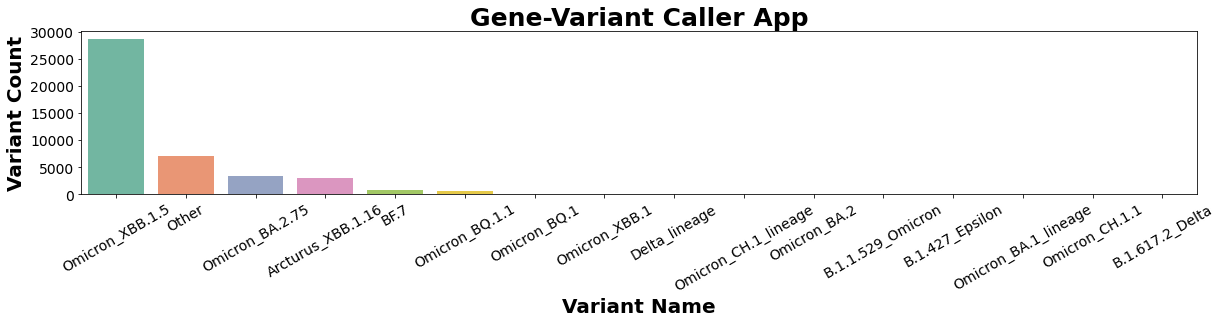

In [22]:
# Calculate the frequency counts of each category
counts = df['variant'].value_counts()

# Sort the categories based on counts in descending order
categories = counts.index.tolist()

plt.figure(figsize=(20, 3)) 
sns.countplot(x='variant', data=df,order=categories, palette='Set2')
plt.title('Gene-Variant Caller App', fontweight='bold', fontsize=25)
plt.xlabel('Variant Name', fontweight='bold', fontsize=20)
plt.ylabel('Variant Count', fontweight='bold', fontsize=20)
# Rotate x-labels vertically
plt.xticks(rotation=30,fontsize=14)#'vertical'#, fontweight='bold'
plt.yticks(fontsize=14)
plt.show()



In [17]:
df['predicted']= y_new
df['compare']=df['variant']==df['predicted']
performance=(df[df['compare']==True].count())/(len(df))*100
performance

index               90.635062
genome_width        90.635062
names               90.635062
genome              90.635062
date                90.635062
country             90.635062
spike_cdna          90.635062
spike_cdna_width    90.635062
spike_aa            90.635062
spike_aa_width      90.635062
type                90.635062
variant             90.635062
predicted           90.635062
compare             90.635062
dtype: float64

In [18]:
df['predicted']= y_new
df['compare']=df['variant']==df['predicted']
performance=(df[df['compare']==True].count())/(len(df))*100
performance

index               90.635062
genome_width        90.635062
names               90.635062
genome              90.635062
date                90.635062
country             90.635062
spike_cdna          90.635062
spike_cdna_width    90.635062
spike_aa            90.635062
spike_aa_width      90.635062
type                90.635062
variant             90.635062
predicted           90.635062
compare             90.635062
dtype: float64

In [26]:
df['predicted'] = y_new
df['compare'] = df['variant'] == df['predicted']
performance = (df[df['compare'] == True].shape[0] / len(df)) * 100
performance

90.6350619990409

In [20]:
performance = round((df[df['compare'] == True].shape[0] / len(df)) * 100,2)

dfp = pd.DataFrame({"Percentage_Agreement_between_Gene-Variant_Caller_and_Model_Prediction": [performance]})
dfp["index"]=1
dfp = dfp.reindex(columns=['index',"Percentage_Agreement_between_Gene-Variant_Caller_and_Model_Prediction"])
dfp

,index,Percentage_Agreement_between_Gene-Variant_Caller_and_Model_Prediction
0,1,90.64


In [21]:
performance= pd.DataFrame(performance)
performance

ValueError: DataFrame constructor not properly called!

In [27]:
dfa=df[df['variant']=='Arcturus_XBB.1.16']
dfa

,index,genome_width,names,genome,date,country,spike_cdna,spike_cdna_width,spike_aa,spike_aa_width,type,variant,predicted,compare
62,62,29649,hCoV-19/New_Zealand/23ZA1840/2023|EPI_ISL_1750...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,2023-04-04,New_Zealand,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Arcturus_XBB.1.16,Arcturus_XBB.1.16,True
102,102,29465,hCoV-19/Malaysia/IMR_CV05522/2023|EPI_ISL_1750...,TTNGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTG...,2023-04-06,Malaysia,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Arcturus_XBB.1.16,Arcturus_XBB.1.16,True
103,103,29503,hCoV-19/Malaysia/IMR_CV05521/2023|EPI_ISL_1750...,TTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCG...,2023-04-05,Malaysia,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Arcturus_XBB.1.16,Arcturus_XBB.1.16,True
104,104,29384,hCoV-19/Malaysia/IMR_CV05514/2023|EPI_ISL_1750...,CCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACT...,2023-04-04,Malaysia,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Arcturus_XBB.1.16,Arcturus_XBB.1.16,True
105,105,29038,hCoV-19/Malaysia/IMR_CV05512/2023|EPI_ISL_1750...,ATAGGTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCT...,2023-04-05,Malaysia,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Arcturus_XBB.1.16,Arcturus_XBB.1.16,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43680,43680,29650,hCoV-19/Canada/AB-ABPHL-97346/2023|EPI_ISL_176...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,2023-04-26,Canada,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Arcturus_XBB.1.16,Arcturus_XBB.1.16,True
43690,43690,29649,hCoV-19/Canada/AB-ABPHL-97340/2023|EPI_ISL_176...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,2023-04-05,Canada,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Arcturus_XBB.1.16,Arcturus_XBB.1.16,True
43706,43706,29649,hCoV-19/Canada/AB-ABPHL-97406/2023|EPI_ISL_176...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,2023-04-24,Canada,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Arcturus_XBB.1.16,Arcturus_XBB.1.16,True
43707,43707,29649,hCoV-19/Canada/AB-ABPHL-97375/2023|EPI_ISL_176...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,2023-04-25,Canada,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Arcturus_XBB.1.16,Arcturus_XBB.1.16,True


<Figure size 3312x576 with 0 Axes>

<Axes: xlabel='country', ylabel='count'>

Text(0.5, 1.0, 'Caller App: How far has the NEW Arcturus_XBB.1.16 Variant travelled?')

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Counts')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Japan'),
  Text(2, 0, 'Shanghai'),
  Text(3, 0, 'Singapore'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'South_Korea'),
  Text(7, 0, 'India'),
  Text(8, 0, 'Thailand'),
  Text(9, 0, 'Austria'),
  Text(10, 0, 'Sweden'),
  Text(11, 0, 'Malaysia'),
  Text(12, 0, 'Switzerland'),
  Text(13, 0, 'Hubei'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sichuan'),
  Text(16, 0, 'Reunion'),
  Text(17, 0, 'Zhejiang'),
  Text(18, 0, 'Scotland'),
  Text(19, 0, 'Ireland'),
  Text(20, 0, 'England'),
  Text(21, 0, 'Yunnan'),
  Text(22, 0, 'Netherlands'),
  Text(23, 0, 'Vietnam'),
  Text(24, 0, 'Guangdong'),
  Text(25, 0, 'Italy'),
  Text(26, 0, 'Jiangsu'),
  Text(27, 0, 'Anhui'),
  Text(28, 0, 'Portugal'),
  Text(29, 0, 'Denmark'),
  Text

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700')])

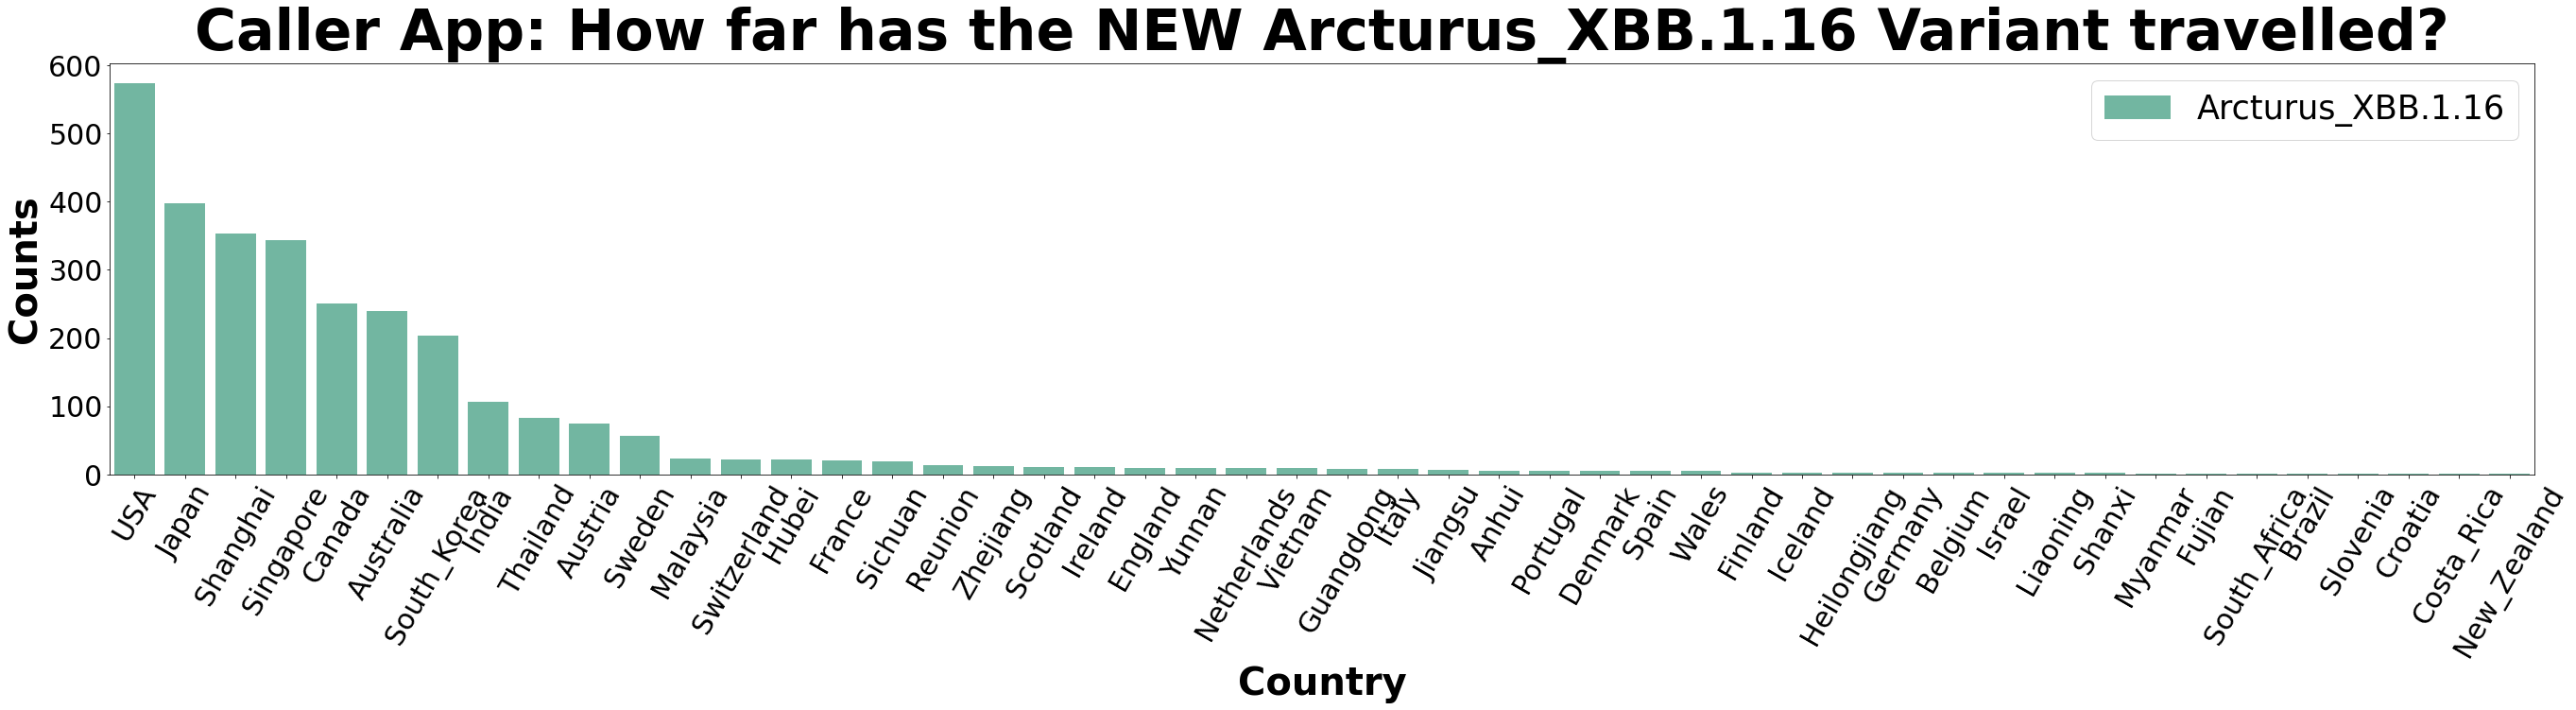

In [28]:
# Calculate the frequency counts of each category
counts =dfa[dfa['variant']=='Arcturus_XBB.1.16']
counts = counts['country'].value_counts()

# Sort the categories based on counts in descending order
categories = counts.index.tolist()

plt.figure(figsize=(46, 8)) 
sns.countplot(x='country', data=dfa,hue='variant', order=categories, palette='Set2')
plt.title('Caller App: How far has the NEW Arcturus_XBB.1.16 Variant travelled?', fontweight='bold', fontsize=60)
plt.xlabel('Country', fontweight='bold', fontsize=40)
plt.ylabel('Counts', fontweight='bold', fontsize=40)
# Rotate x-labels vertically
plt.xticks(rotation=60,fontsize=30)#'vertical'
plt.yticks(fontsize=30)
#Get the current axes
ax = plt.gca()

# Get the legend
legend = ax.legend()

# Set the font size of the legend labels
for label in legend.get_texts():
    label.set_fontsize(30)
ax.legend(prop={'size': 35}, markerscale=1.5)
plt.show()

# Real World Variant Data using Variant Caller

In [536]:
test

,spike_aa,spike_aa_width,variant,RFmodel_predicted
0,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1270,Omicron_BA.2.75,Omicron_BA.2.75
1,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5
2,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5
3,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5
4,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Other,Arcturus_XBB.1.16
...,...,...,...,...
43786,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Other,Omicron_XBB.1.5
43787,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5
43788,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5
43789,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,Omicron_XBB.1.5,Omicron_XBB.1.5


<Figure size 2016x288 with 0 Axes>

<Axes: xlabel='predicted', ylabel='count'>

Text(0.5, 1.0, 'Model Prediction')

Text(0.5, 0, 'Variant Name')

Text(0, 0.5, 'Variant Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Omicron_XBB.1.5'),
  Text(1, 0, 'Arcturus_XBB.1.16'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Omicron_BA.2.75'),
  Text(4, 0, 'BF.7'),
  Text(5, 0, 'Omicron_BQ.1.1'),
  Text(6, 0, 'Omicron_BQ.1'),
  Text(7, 0, 'Delta_lineage'),
  Text(8, 0, 'Omicron_BA.2'),
  Text(9, 0, 'B.1.1.529_Omicron'),
  Text(10, 0, 'Omicron_CH.1.1'),
  Text(11, 0, 'B.1.427_Epsilon'),
  Text(12, 0, 'Omicron_CH.1_lineage'),
  Text(13, 0, 'B.1.617.2_Delta'),
  Text(14, 0, 'Omicron_BA.4')])

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 [Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000'),
  Text(0, 30000.0, '30000'),
  Text(0, 35000.0, '35000')])

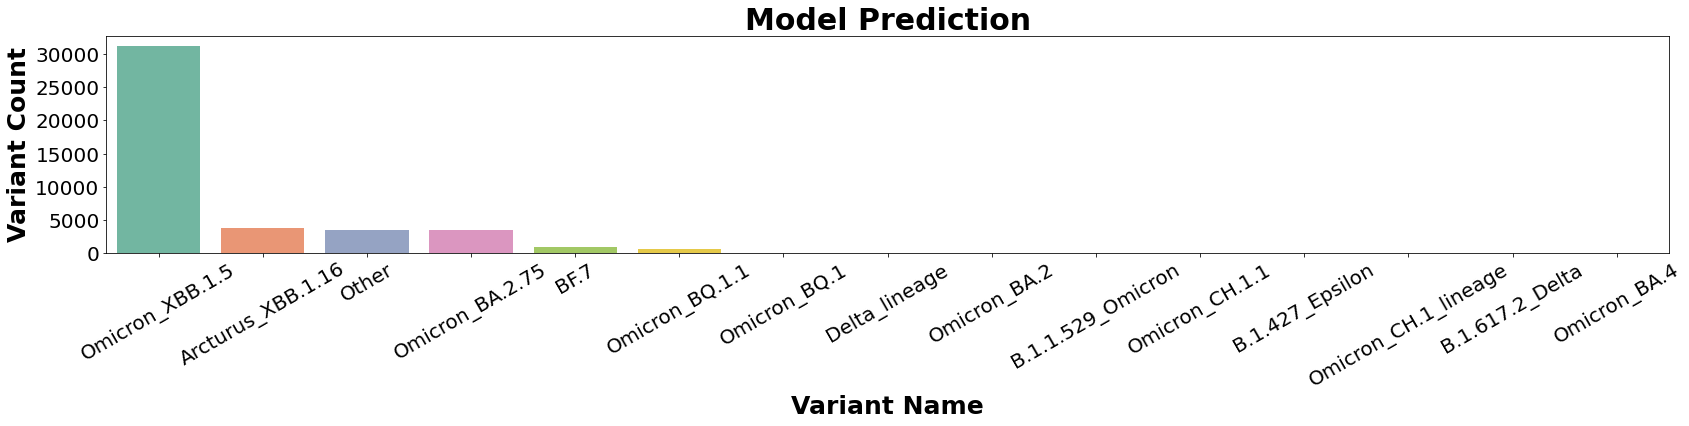

In [30]:
# Calculate the frequency counts of each category
counts = df['predicted'].value_counts()

# Sort the categories based on counts in descending order
categories = counts.index.tolist()

plt.figure(figsize=(28, 4)) 
sns.countplot(x='predicted', data=df,order=categories, palette='Set2')
plt.title('Model Prediction', fontweight='bold', fontsize=30)
plt.xlabel('Variant Name', fontweight='bold', fontsize=25)
plt.ylabel('Variant Count', fontweight='bold', fontsize=25)



# Rotate x-labels vertically
plt.xticks(rotation=30,fontsize=20)#'vertical'
plt.yticks(fontsize=20)
plt.show()


In [31]:
dfb=df[df['predicted']=='Arcturus_XBB.1.16']
dfb

,index,genome_width,names,genome,date,country,spike_cdna,spike_cdna_width,spike_aa,spike_aa_width,type,variant,predicted,compare
4,4,29248,hCoV-19/Austria/AGES-1134309/2023|EPI_ISL_1750...,TTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGC...,2023-04-12,Austria,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Other,Arcturus_XBB.1.16,False
8,8,29248,hCoV-19/Austria/AGES-1134301/2023|EPI_ISL_1750...,TTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGC...,2023-04-12,Austria,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Omicron_XBB.1.5,Arcturus_XBB.1.16,False
25,25,29460,hCoV-19/Austria/AGES-1134270/2023|EPI_ISL_1750...,CCGGGTGTGACCAAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTC...,2023-04-11,Austria,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Other,Arcturus_XBB.1.16,False
62,62,29649,hCoV-19/New_Zealand/23ZA1840/2023|EPI_ISL_1750...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,2023-04-04,New_Zealand,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Arcturus_XBB.1.16,Arcturus_XBB.1.16,True
102,102,29465,hCoV-19/Malaysia/IMR_CV05522/2023|EPI_ISL_1750...,TTNGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTG...,2023-04-06,Malaysia,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Arcturus_XBB.1.16,Arcturus_XBB.1.16,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43690,43690,29649,hCoV-19/Canada/AB-ABPHL-97340/2023|EPI_ISL_176...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,2023-04-05,Canada,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Arcturus_XBB.1.16,Arcturus_XBB.1.16,True
43706,43706,29649,hCoV-19/Canada/AB-ABPHL-97406/2023|EPI_ISL_176...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,2023-04-24,Canada,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Arcturus_XBB.1.16,Arcturus_XBB.1.16,True
43707,43707,29649,hCoV-19/Canada/AB-ABPHL-97375/2023|EPI_ISL_176...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,2023-04-25,Canada,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Arcturus_XBB.1.16,Arcturus_XBB.1.16,True
43713,43713,29649,hCoV-19/Canada/AB-ABPHL-97417/2023|EPI_ISL_176...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,2023-04-26,Canada,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,3807,MFVFLVLLPLVSSQCVNLITRTQSYTNSFTRGVYYPDKVFRSSVLH...,1269,variant,Arcturus_XBB.1.16,Arcturus_XBB.1.16,True


<Figure size 3312x576 with 0 Axes>

<Axes: xlabel='country', ylabel='count'>

Text(0.5, 1.0, 'Model: How far has the NEW Arcturus_XBB.1.16 Variant travelled?')

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Counts')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Japan'),
  Text(2, 0, 'Singapore'),
  Text(3, 0, 'Shanghai'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'South_Korea'),
  Text(7, 0, 'India'),
  Text(8, 0, 'Thailand'),
  Text(9, 0, 'Austria'),
  Text(10, 0, 'Sweden'),
  Text(11, 0, 'France'),
  Text(12, 0, 'Scotland'),
  Text(13, 0, 'Malaysia'),
  Text(14, 0, 'Switzerland'),
  Text(15, 0, 'Hubei'),
  Text(16, 0, 'Indonesia'),
  Text(17, 0, 'Sichuan'),
  Text(18, 0, 'Italy'),
  Text(19, 0, 'Reunion'),
  Text(20, 0, 'Spain'),
  Text(21, 0, 'Vietnam'),
  Text(22, 0, 'Ireland'),
  Text(23, 0, 'Guangdong'),
  Text(24, 0, 'England'),
  Text(25, 0, 'Zhejiang'),
  Text(26, 0, 'Netherlands'),
  Text(27, 0, 'Yunnan'),
  Text(28, 0, 'An

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800'),
  Text(0, 900.0, '900')])

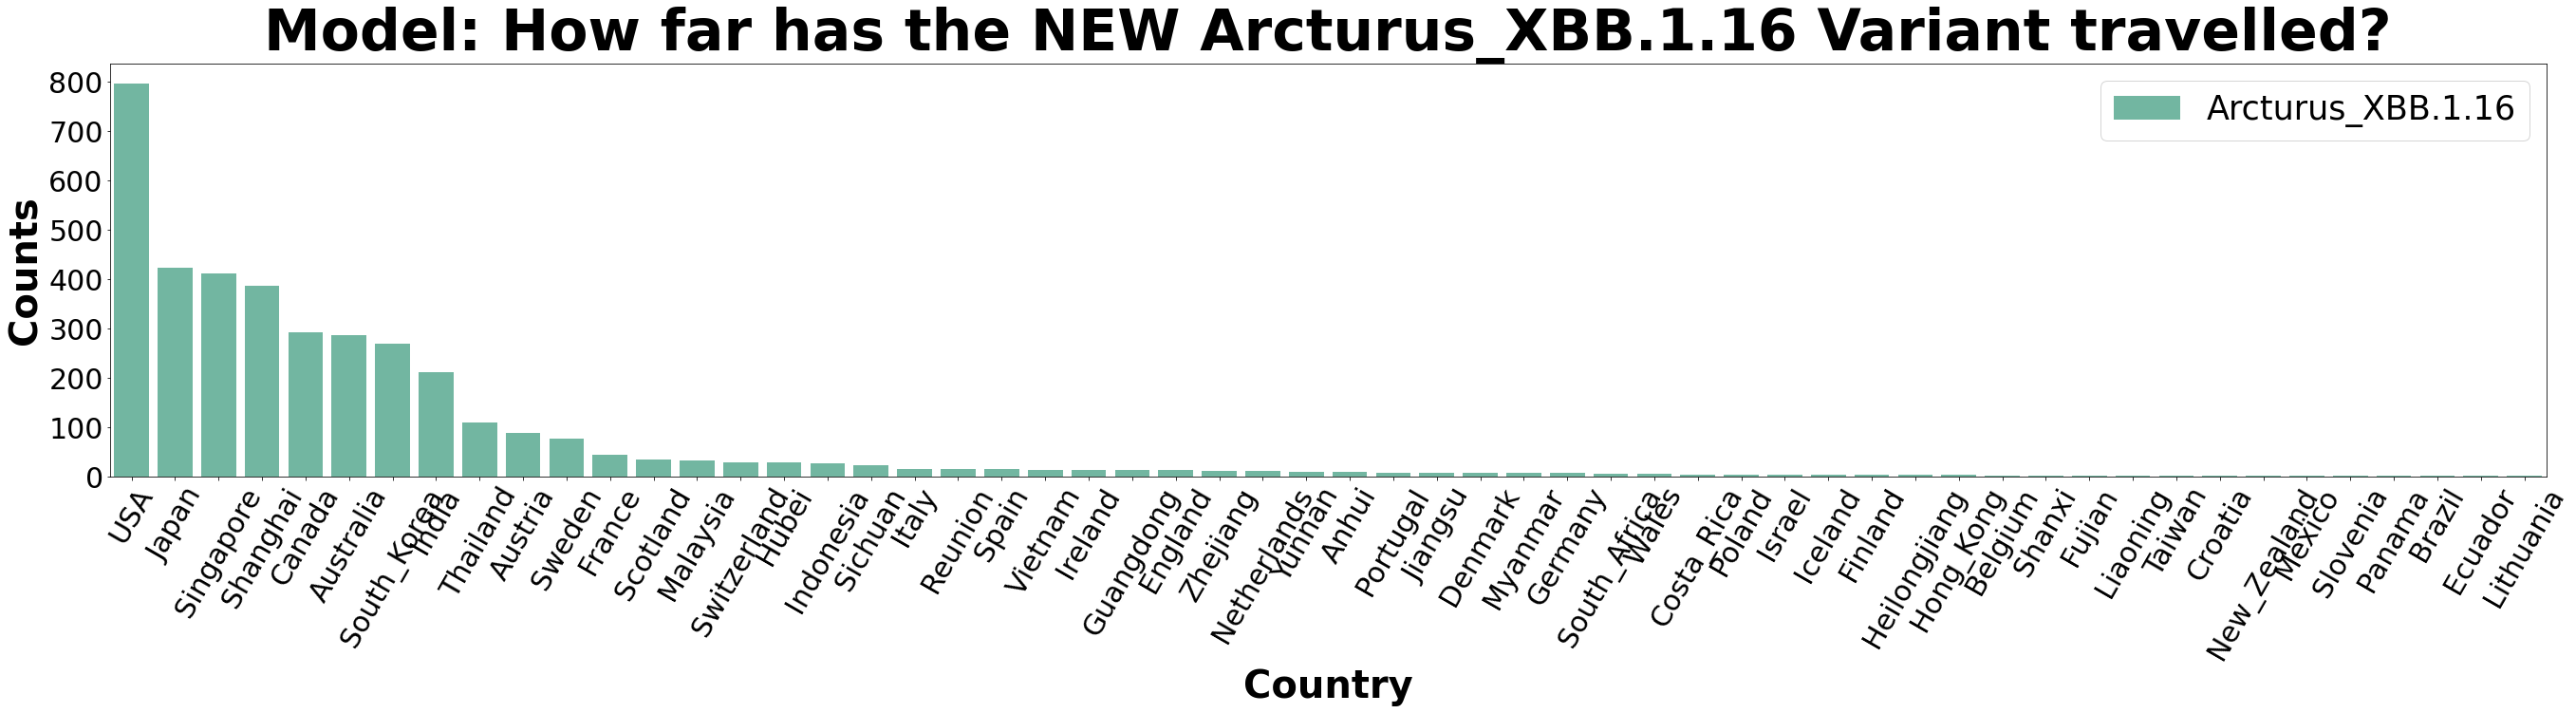

In [37]:
# Calculate the frequency counts of each category
counts =dfb[dfb['predicted']=='Arcturus_XBB.1.16']
counts = counts['country'].value_counts()

# Sort the categories based on counts in descending order
categories = counts.index.tolist()

plt.figure(figsize=(46, 8)) 
sns.countplot(x='country', data=dfb,hue='predicted', order=categories, palette='Set2')
plt.title('Model: How far has the NEW Arcturus_XBB.1.16 Variant travelled?', fontweight='bold', fontsize=60)
plt.xlabel('Country', fontweight='bold', fontsize=40)
plt.ylabel('Counts', fontweight='bold', fontsize=40)
# Rotate x-labels vertically
plt.xticks(rotation=60,fontsize=30)#'vertical'
plt.yticks(fontsize=30)
#Get the current axes
ax = plt.gca()

# Get the legend
legend = ax.legend()

# Set the font size of the legend labels
for label in legend.get_texts():
    label.set_fontsize(30)
ax.legend(prop={'size': 35}, markerscale=1.5)
plt.show()

# Function to run RF Model on the App

In [ ]:
        def random_forest():
            columns = tree['columns']
            df = pd.DataFrame(columns=columns)
            if tree.get_children():
                for item in tree.get_children():
                    values = tree.item(item)['values']
                    df.loc[len(df)] = values

            #test = pd.read_csv('new_for_model_testing2.csv')
            #test = pd.read_csv('new_for_model_testing.csv')
            #world_monitorApri_to_May17_2023.csv
            #test = pd.read_csv('world_monitorApri_to_May17_2023.csv')
            #test=test[['spike_aa','spike_aa_width','variant']]
            new_sequence= np.array(df['spike_aa'])#[2]#'MAAFVKVLVTLYLAVAVFVFNAKGEHR'
            #new_sequence= list(test['spike_aa'])[700]
            num_genes=len(df)
            max_sequence_length=1277#modelling_set['spike_aa_width'].max()
            # Convert amino acid sequences to numerical vectors
            aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
            X_encoded = []
            for i in range(num_genes):
                encoded_seq = [aa_to_index[aa] for aa in new_sequence[i]]
                padded_seq = np.pad(encoded_seq, (0, max_sequence_length - len(encoded_seq)))
                X_encoded.append(padded_seq)

            # Use the trained classifier to predict the class of the new sequence
            clf=load(filename = “RandomForestClassifier20230517_rs42.pickle”)
            y_new = clf.predict(X_encoded)
            print('Predicted class:', y_new)
            df['RFmodel_predicted']= y_new
            df['RFmodel_predicted']= y_new
            df['compare']=df['variant']==df['RFmodel_predicted']
            l1=list(df)
            tree["columns"] = l1
            rows = [(tree.set(item, 0), item) for item in tree.get_children('')]
            for column in tree['column']:
                tree.heading(column,text=column)
                df_rows = df.to_numpy().tolist()
            for record in tree.get_children():
                tree.delete(record)
            for row in df_rows:
                tree.insert("",0,values=row)
                rows.sort()#
            tree.column('#0', stretch=NO, minwidth=0, width=0)
            tree.column('#1', stretch=NO, minwidth=0, width=90, anchor='n')#index
            tree.column('#2', stretch=YES, minwidth=0, width=80, anchor='n')#Prefix
            #tree.column('#3', stretch=YES, minwidth=0, width=240, anchor='n')#Center
            columns = ('index',)#This is for sorting only one column 'index'
            for col in columns:
                tree.heading(col, text=col,command=lambda c=col: sort_column(tree, c, False))

In [ ]:
df['RFmodel_predicted']= y_new
df['compare']=df['variant']==df['RFmodel_predicted']
performance=(df[df['compare']==True].count())/(len(df))*100
performance


df['RFmodel_predicted'] = y_new
df['compare'] = df['variant'] == df['RFmodel_predicted']
performance = (df[df['compare'] == True].shape[0] / len(df)) * 100
performance

In [ ]:
def random_forest():
    columns = tree['columns']
    df = pd.DataFrame(columns=columns)
    
    if tree.get_children():
        for item in tree.get_children():
            values = tree.item(item)['values']
            df.loc[len(df)] = values
            
        if 'spike_aa' in df.columns:
            new_sequence = np.array(df['spike_aa'])
            num_genes = len(df)
            max_sequence_length = 1277  # Update this with the correct value

            # Convert amino acid sequences to numerical vectors
            amino_acids = 'ACDEFGHIKLMNPQRSTVWY*'
            aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
            X_encoded = []
            for i in range(num_genes):
                encoded_seq = [aa_to_index[aa] for aa in new_sequence[i]]
                padded_seq = np.pad(encoded_seq, (0, max_sequence_length - len(encoded_seq)))
                X_encoded.append(padded_seq)

            # Use the trained classifier to predict the class of the new sequences
            clf = load(filename="RandomForestClassifier20230517_rs42.pickle")
            y_new = clf.predict(X_encoded)

            df['model_predicted'] = y_new
            df['compare'] = df['variant'] == df['model_predicted']

            l1=list(df)
            tree["columns"] = l1
            rows = [(tree.set(item, 0), item) for item in tree.get_children('')]
            for column in tree['column']:
                tree.heading(column,text=column)
            df_rows = df.to_numpy().tolist()
            for record in tree.get_children():
                    tree.delete(record)
            for row in df_rows:
                tree.insert("",0,values=row)
                rows.sort()#
            tree.column('#0', stretch=NO, minwidth=0, width=90)
            tree.column('#1', stretch=NO, minwidth=0, width=80, anchor='n')#index
            tree.column('#2', stretch=NO, minwidth=0, width=130, anchor='n')#width
            tree.column('#3', stretch=YES, minwidth=0, width=140, anchor='n')#name
            tree.column('#4', stretch=NO, minwidth=0, width=130, anchor='n')#seqs
            tree.column('#5', stretch=NO, minwidth=0, width=120, anchor='n')#date
            tree.column('#6', stretch=NO, minwidth=0, width=150, anchor='n')#country
            tree.column('#7', stretch=NO, minwidth=0, width=170, anchor='n')#spike-cdna
            tree.column('#8', stretch=NO, minwidth=0, width=150, anchor='n')#width
            tree.column('#9', stretch=NO, minwidth=0, width=140, anchor='n')#aa
            tree.column('#10', stretch=NO, minwidth=0, width=140, anchor='n')#width
            tree.column('#11', stretch=NO, minwidth=0, width=80, anchor='n')#type
            tree.column('#12', stretch=NO, minwidth=0, width=140, anchor='n')#variant
            tree.column('#13', stretch=NO, minwidth=0, width=160, anchor='n')#variant
            tree.column('#14', stretch=NO, minwidth=0, width=80, anchor='n')#variant
            columns = ('index',)#This is for sorting only one column 'index'
            for col in columns:
                tree.heading(col, text=col,command=lambda c=col: sort_column(tree, c, False))

            messagebox.showinfo("Predicted", "Variants Predicted Successfully")
        else:
            messagebox.showerror("Error", "The 'spike_aa' column is missing in the data!")
    else:
        messagebox.showerror("Error", "You have no data to process!")


In [ ]:
def random_forest():
            columns = tree['columns']
            df = pd.DataFrame(columns=columns)

            if tree.get_children():
                for item in tree.get_children():
                    values = tree.item(item)['values']
                    df.loc[len(df)] = values

                if 'spike_aa' in df.columns:
                    new_sequence = np.array(df['spike_aa'])
                    num_genes = len(df)
                    max_sequence_length = 1277  # Update this with the correct value

                    # Convert amino acid sequences to numerical vectors
                    amino_acids = 'ACDEFGHIKLMNPQRSTVWY*'
                    aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
                    X_encoded = []
                    for i in range(num_genes):
                        encoded_seq = [aa_to_index[aa] for aa in new_sequence[i]]
                        padded_seq = np.pad(encoded_seq, (0, max_sequence_length - len(encoded_seq)))
                        X_encoded.append(padded_seq)

                    # Use the trained classifier to predict the class of the new sequences
                    clf = load(filename="RandomForestClassifier20230517_rs42.pickle")
                    y_new = clf.predict(X_encoded)

                    df['model_predicted'] = y_new
                    df['compare'] = df['variant'] == df['model_predicted']

                    l1=list(df)
                    tree["columns"] = l1
                    rows = [(tree.set(item, 0), item) for item in tree.get_children('')]
                    for column in tree['column']:
                        tree.heading(column,text=column)
                        df_rows = df.to_numpy().tolist()
                        for record in tree.get_children():
                                tree.delete(record)
                                for row in df_rows:
                                    tree.insert("",0,values=row)
                                    rows.sort()#
                                    tree.column('#0', stretch=NO, minwidth=0, width=90)
                                    tree.column('#1', stretch=NO, minwidth=0, width=80, anchor='n')#index
                                    tree.column('#2', stretch=NO, minwidth=0, width=130, anchor='n')#width
                                    tree.column('#3', stretch=YES, minwidth=0, width=140, anchor='n')#name
                                    tree.column('#4', stretch=NO, minwidth=0, width=130, anchor='n')#seqs
                                    tree.column('#5', stretch=NO, minwidth=0, width=120, anchor='n')#date
                                    tree.column('#6', stretch=NO, minwidth=0, width=150, anchor='n')#country
                                    tree.column('#7', stretch=NO, minwidth=0, width=170, anchor='n')#spike-cdna
                                    tree.column('#8', stretch=NO, minwidth=0, width=150, anchor='n')#width
                                    tree.column('#9', stretch=NO, minwidth=0, width=140, anchor='n')#aa
                                    tree.column('#10', stretch=NO, minwidth=0, width=140, anchor='n')#width
                                    tree.column('#11', stretch=NO, minwidth=0, width=80, anchor='n')#type
                                    tree.column('#12', stretch=NO, minwidth=0, width=140, anchor='n')#variant
                                    tree.column('#13', stretch=NO, minwidth=0, width=160, anchor='n')#variant
                                    tree.column('#14', stretch=NO, minwidth=0, width=80, anchor='n')#variant
                                    columns = ('index',)#This is for sorting only one column 'index'
                                    for col in columns:
                                        tree.heading(col, text=col,command=lambda c=col: sort_column(tree, c, False))

                    messagebox.showinfo("Predicted", "Variants Predicted Successfully")
                else:
                    messagebox.showerror("Error", "The 'spike_aa' column is missing in the data!")
            else:
                messagebox.showerror("Error", "You have no data to process!")

In [ ]:
def compare():
            columns = tree['columns']
            df = pd.DataFrame(columns=columns)

            if tree.get_children():
                for item in tree.get_children():
                    values = tree.item(item)['values']
                    df.loc[len(df)] = values

                if 'compare' in df.columns:
                    
                    performance = round((df[df['compare'] == "True"].shape[0] / len(df)) * 100,2)

                    df1 = pd.DataFrame({"Percentage_Agreement_between_Gene-Variant_Caller_and_Model_Prediction": [performance]})
                    df1["index"]=1
                    df1 = df1.reindex(columns=['index',"Percentage_Agreement_between_Gene-Variant_Caller_and_Model_Prediction"])
                    
                    l1 = list(df1)
                    tree["columns"] = l1
                    rows = [(tree.set(item, 0), item) for item in tree.get_children('')]

                    for column in tree['columns']:
                        tree.heading(column, text=column)

                    df_rows = df1.values.tolist()

                    for record in tree.get_children():
                        tree.delete(record)

                    for row in df_rows:
                        tree.insert("", "end", values=row)

                    tree.column('#0', stretch=tk.NO, minwidth=0, width=90)
                    tree.column('#1', stretch=tk.NO, minwidth=0, width=80, anchor='n')  # index
                    tree.column('#2', stretch=tk.YES, minwidth=0, width=130, anchor='n')  # width

                    columns = ('index',)  # This is for sorting only one column 'index'
                    for col in columns:
                        tree.heading(col, text=col, command=lambda c=col: sort_column(tree, c, False))

                    messagebox.showinfo("Compared", "Gene-Variant Caller and Model Prediction Successfully Compared")
                else:
                    messagebox.showerror("Error", "The 'compare' column is missing in the data!")
            else:
                messagebox.showerror("Error", "You have no data to process!")
        